## Abschlussprojekt: Analyse der Kundenabwanderung

<p><strong>Szenario:</strong> Du arbeitest für den Telekommunikationsanbieter Teleconfia. Dieser probiert gerade, in den USA Fuß zu fassen. Als erstes Probegebiet wurde Florida ausgewählt. Neue Kunden konnten ein Jahr lang zu sehr günstigen Konditionen Handys im Teleconfia-Netz nutzen. Nicht alle Kunden sind ein Jahr lang geblieben. Viele sind abgewandert. Dieser Kundenabwanderung, auch <em>churn</em> genannt, soll durch zwei Marketingkampagnen entgegengewirkt werden.</p>
<p>Die erste Marketingkampagne zielt auf Stadtgebiete, in denen Plakate geklebt werden sollen. Ein Stadtgebiet ist eine kleine Stadt bzw. ein Stadtteil einer Großstadt. Die vier Stadtgebiete mit der höchsten Kundenabwanderung sollen ausgewählt werden, um in ihnen die Marketingkampagne zu starten. Die zweite Marketingkampagne zielt auf individuelle Kunden. Jene Kunden, die wahrscheinlich Teleconfia verlassen werden, sollen angerufen werden, um mit ihnen Sonderkonditionen abzustimmen.</p>
<p>Ziel soll es sein, die Stadtgebiete bzw. diejenigen Kunden zu identifizieren, für welche Marketingkampagnen lanciert werden sollen. Hierbei musst du herausfinden, welche Datenreihen für die Entscheidung herangezogen werden sollten. Auch sollst du herausfinden, ob es bestimmte Faktoren gibt, ab denen die Kunden kontaktiert werden sollten. Mit Hilfe einer logistischen Regression soll zum Abschluss bestimmt werden, ab welchem kritischen Wert ein Kunde wahrscheinlicher abwandern wird als nicht abzuwandern. </p>
<p>Deine Entscheidungen und Empfehlungen sollst du stichhaltig begründen und in Form von Visualisierungen veranschaulichen.</p>


<p>Die Daten werden dir in einer Datenbank namens <em>telco_churn.db</em> zur Verfügung gestellt. Das folgende Datenwörterbuch erklärt die Struktur.</p>
<p>Tabelle <code>churn_data</code>:</p>
<table>
<thead>
<tr>
<th>Spaltennummer</th>
<th align="center">Spaltenname</th>
<th align="center">Datenniveau</th>
<th align="right">Beschreibung</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td align="center"><code>account_length</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl der Tage, seit denen der Kunde ein Konto beim Telekommunikationsanbieter hat</td>
</tr>
<tr>
<td>1</td>
<td align="center"><code>international_plan</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Vertrag mit Sonderkonditionen für günstigere Anrufe ins Ausland</td>
</tr>
<tr>
<td>2</td>
<td align="center"><code>voice_mail_plan</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Vertrag mit Sonderkonditionen für mehr Speicher in der Mailbox</td>
</tr>
<tr>
<td>3</td>
<td align="center"><code>number_vmail_messages</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl der Nachrichten in der Mailbox</td>
</tr>
<tr>
<td>4</td>
<td align="center"><code>total_day_minutes</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Dauer (Minuten) aller Anrufe von 8 Uhr bis 16 Uhr</td>
</tr>
<tr>
<td>5</td>
<td align="center"><code>total_day_calls</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl aller Anrufe von 8 Uhr bis 16 Uhr</td>
</tr>
<tr>
<td>6</td>
<td align="center"><code>total_day_charge</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Berechnete Kosten für alle Anrufe von 8 Uhr bis 16 Uhr</td>
</tr>
<tr>
<td>7</td>
<td align="center"><code>total_eve_minutes</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Dauer (Minuten) aller Anrufe von 16 Uhr bis 22 Uhr</td>
</tr>
<tr>
<td>8</td>
<td align="center"><code>total_eve_calls</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl aller Anrufe von 16 Uhr bis 22 Uhr</td>
</tr>
<tr>
<td>9</td>
<td align="center"><code>total_eve_charge</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Berechnete Kosten für alle Anrufe von 16 Uhr bis 22 Uhr</td>
</tr>
<tr>
<td>10</td>
<td align="center"><code>total_night_minutes</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Dauer (Minuten) aller Anrufe von 22 Uhr bis 8 Uhr</td>
</tr>
<tr>
<td>11</td>
<td align="center"><code>total_night_calls</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl aller Anrufe von 22 Uhr bis 8 Uhr</td>
</tr>
<tr>
<td>12</td>
<td align="center"><code>total_night_charge</code></td>
<td align="center">numerisch (<code>float</code>)</td>
<td align="right">Berechnete Kosten für alle Anrufe von 22 Uhr bis 8 Uhr</td>
</tr>
<tr>
<td>13</td>
<td align="center"><code>customer_service_calls</code></td>
<td align="center">numerisch (<code>int</code>)</td>
<td align="right">Anzahl der Anrufe beim Kundenservice, z. B. wegen technischer Störungen</td>
</tr>
<tr>
<td>14</td>
<td align="center"><code>churn</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Abwanderung des Kunden (0=nein, 1=ja)</td>
</tr>
<tr>
<td>15</td>
<td align="center"><code>local_area_code</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Ortsvorwahl</td>
</tr>
<tr>
<td>16</td>
<td align="center"><code>phone_num</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Telefonnummer des Kunden ohne Ortsvorwahl</td>
</tr>
</tbody></table>
<p>Tabelle <code>cities</code>:</p>
<table>
<thead>
<tr>
<th>Spaltennummer</th>
<th align="center">Spaltenname</th>
<th align="center">Datenniveau</th>
<th align="right">Beschreibung</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td align="center"><code>city</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Stadtgebiete</td>
</tr>
<tr>
<td>1</td>
<td align="center"><code>area_code</code></td>
<td align="center">kategorisch (nominal)</td>
<td align="right">Ortsvorwahl</td>
</tr>
</tbody></table>


### 1)Einlesen von Daten <br>
#### -> 1 Imports and converting SQL database into a pandas Dataframe
#### no access to the used telco_churn.db so this part will be commented out 

In [17]:
import sqlalchemy as sa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
import matplotlib.patches as mpatches

plt.style.use('ggplot')

In [18]:
engine = sa.create_engine('sqlite:///telco_churn.db')
connection = engine.connect()

inspector = sa.inspect(engine)
table_names = inspector.get_table_names()

In [19]:
# print(table_names)

['churn_data', 'cities']

In [20]:
# #Overview of churn_data table
# query_string = '''SELECT * 
# FROM churn_data
# LIMIT 10
# '''
# df_churn = pd.read_sql(query_string, connection)
# display(df_churn)

# #Overview of cities table
# query_string = '''SELECT * 
# FROM cities
# LIMIT 10
# '''

# df_cities = pd.read_sql(query_string, connection)
# display(df_cities)

<div class="lm-Widget p-Widget lm-Panel p-Panel jp-OutputArea-child"><div class="lm-Widget p-Widget jp-OutputPrompt jp-OutputArea-prompt"></div><div class="lm-Widget p-Widget jp-RenderedHTMLCommon jp-RenderedHTML jp-OutputArea-output" data-mime-type="text/html"><div>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align:right">
      <th></th>
      <th>account_length</th>
      <th>international_plan</th>
      <th>voice_mail_plan</th>
      <th>number_vmail_messages</th>
      <th>total_day_minutes</th>
      <th>total_day_calls</th>
      <th>total_day_charge</th>
      <th>total_eve_minutes</th>
      <th>total_eve_calls</th>
      <th>total_eve_charge</th>
      <th>total_night_minutes</th>
      <th>total_night_calls</th>
      <th>total_night_charge</th>
      <th>customer_service_calls</th>
      <th>churn</th>
      <th>local_area_code</th>
      <th>phone_num</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>131.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>187.9</td>
      <td>110.0</td>
      <td>31.94</td>
      <td>200.5</td>
      <td>101.0</td>
      <td>17.04</td>
      <td>202.6</td>
      <td>125.0</td>
      <td>9.12</td>
      <td>2.0</td>
      <td>0</td>
      <td>850.0</td>
      <td>1473.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>63.0</td>
      <td>yes</td>
      <td>yes</td>
      <td>21.0</td>
      <td>151.5</td>
      <td>99.0</td>
      <td>25.76</td>
      <td>147.8</td>
      <td>89.0</td>
      <td>12.56</td>
      <td>210.4</td>
      <td>114.0</td>
      <td>9.47</td>
      <td>1.0</td>
      <td>0</td>
      <td>786.0</td>
      <td>8029.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>13.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>303.2</td>
      <td>133.0</td>
      <td>51.54</td>
      <td>170.5</td>
      <td>86.0</td>
      <td>14.49</td>
      <td>227.6</td>
      <td>80.0</td>
      <td>10.24</td>
      <td>0.0</td>
      <td>1</td>
      <td>904.0</td>
      <td>7468.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>129.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>159.1</td>
      <td>100.0</td>
      <td>27.05</td>
      <td>202.5</td>
      <td>90.0</td>
      <td>17.21</td>
      <td>233.1</td>
      <td>96.0</td>
      <td>10.49</td>
      <td>2.0</td>
      <td>0</td>
      <td>305.0</td>
      <td>4979.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>120.0</td>
      <td>no</td>
      <td>yes</td>
      <td>28.0</td>
      <td>215.8</td>
      <td>123.0</td>
      <td>36.69</td>
      <td>285.2</td>
      <td>76.0</td>
      <td>24.24</td>
      <td>192.1</td>
      <td>78.0</td>
      <td>8.64</td>
      <td>1.0</td>
      <td>0</td>
      <td>239.0</td>
      <td>9620.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>108.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>210.7</td>
      <td>112.0</td>
      <td>35.82</td>
      <td>238.7</td>
      <td>73.0</td>
      <td>20.29</td>
      <td>253.6</td>
      <td>90.0</td>
      <td>11.41</td>
      <td>3.0</td>
      <td>0</td>
      <td>786.0</td>
      <td>1688.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>109.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>180.0</td>
      <td>100.0</td>
      <td>30.60</td>
      <td>229.0</td>
      <td>103.0</td>
      <td>19.47</td>
      <td>139.4</td>
      <td>105.0</td>
      <td>6.27</td>
      <td>3.0</td>
      <td>0</td>
      <td>305.0</td>
      <td>2653.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>107.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>189.7</td>
      <td>76.0</td>
      <td>32.25</td>
      <td>156.1</td>
      <td>65.0</td>
      <td>13.27</td>
      <td>244.0</td>
      <td>91.0</td>
      <td>10.98</td>
      <td>5.0</td>
      <td>0</td>
      <td>407.0</td>
      <td>1399.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>74.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>282.5</td>
      <td>114.0</td>
      <td>48.03</td>
      <td>219.9</td>
      <td>48.0</td>
      <td>18.69</td>
      <td>170.0</td>
      <td>115.0</td>
      <td>7.65</td>
      <td>1.0</td>
      <td>1</td>
      <td>239.0</td>
      <td>6837.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>28.0</td>
      <td>no</td>
      <td>no</td>
      <td>0.0</td>
      <td>168.2</td>
      <td>87.0</td>
      <td>28.59</td>
      <td>161.7</td>
      <td>92.0</td>
      <td>13.74</td>
      <td>192.4</td>
      <td>112.0</td>
      <td>8.66</td>
      <td>3.0</td>
      <td>0</td>
      <td>904.0</td>
      <td>5223.0</td>
    </tr>
  </tbody>
</table>
</div></div></div><div class="lm-Widget p-Widget lm-Panel p-Panel jp-OutputArea-child"><div class="lm-Widget p-Widget jp-OutputPrompt jp-OutputArea-prompt"></div><div class="lm-Widget p-Widget jp-RenderedHTMLCommon jp-RenderedHTML jp-OutputArea-output" data-mime-type="text/html"><div>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align:right">
      <th></th>
      <th>city</th>
      <th>area_code</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Orlando1</td>
      <td>321</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Orlando2</td>
      <td>407</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Miami1</td>
      <td>305</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Miami2</td>
      <td>786</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Jacksonville</td>
      <td>904</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Tampa</td>
      <td>813</td>
    </tr>
    <tr>
      <th>6</th>
      <td>West Palm Beach</td>
      <td>561</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Daytona Beach</td>
      <td>386</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Clearwater</td>
      <td>727</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Sarasota</td>
      <td>941</td>
    </tr>
  </tbody>
</table>
</div></div></div>

In [21]:
# # join the cities table into the churn_data without duplicate area_code
# query_string = '''SELECT churn_data.*, cities.city
# FROM churn_data
# JOIN cities
# ON churn_data.local_area_code = cities.area_code'''

# # read sql data into dataframe and closes the connection
# df = pd.read_sql(query_string, connection)
# connection.close()

# # check if everything worked
# display(df.head(10))

In [22]:
# i will use the data.csv because i don't have access to the telco_churn.db

df = pd.read_csv('data.csv')

display(df.head(10))

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num,city
0,131.0,no,no,0.0,187.9,110.0,31.94,200.5,101.0,17.04,202.6,125.0,9.12,2.0,0,850.0,1473.0,Tallahassee
1,63.0,yes,yes,21.0,151.5,99.0,25.76,147.8,89.0,12.56,210.4,114.0,9.47,1.0,0,786.0,8029.0,Miami2
2,13.0,no,no,0.0,303.2,133.0,51.54,170.5,86.0,14.49,227.6,80.0,10.24,0.0,1,904.0,7468.0,Jacksonville
3,129.0,no,no,0.0,159.1,100.0,27.05,202.5,90.0,17.21,233.1,96.0,10.49,2.0,0,305.0,4979.0,Miami1
4,120.0,no,yes,28.0,215.8,123.0,36.69,285.2,76.0,24.24,192.1,78.0,8.64,1.0,0,239.0,9620.0,Cape Coral
5,108.0,no,no,0.0,210.7,112.0,35.82,238.7,73.0,20.29,253.6,90.0,11.41,3.0,0,786.0,1688.0,Miami2
6,109.0,no,no,0.0,180.0,100.0,30.60,229.0,103.0,19.47,139.4,105.0,6.27,3.0,0,305.0,2653.0,Miami1
7,107.0,no,no,0.0,189.7,76.0,32.25,156.1,65.0,13.27,244.0,91.0,10.98,5.0,0,407.0,1399.0,Orlando2
8,74.0,no,no,0.0,282.5,114.0,48.03,219.9,48.0,18.69,170.0,115.0,7.65,1.0,1,239.0,6837.0,Cape Coral
9,28.0,no,no,0.0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112.0,8.66,3.0,0,904.0,5223.0,Jacksonville


### 2 Überprüfung und Reingung von Daten <br>

#### -> 2 Checking and cleaning the data

In [23]:
# checking data
print('shape:')
display(df.shape)
print('\ndtypes:')
display(df.dtypes)
print('\ndescribe:')
display(df.describe())
print('\nisna().sum()')
# checking for missing data
display(df.isna().sum())
# get overview what is excactly missing
print('\n missing vmail_messages \n')
display(df.query('number_vmail_messages.isna()'))
print('\n missing total_day_calls \n')
display(df.query('total_day_calls.isna()'))
print('\n missing total_eve_calls \n')
display(df.query('total_eve_calls.isna()'))
print('\n missing total_eve_calls \n')
display(df.query('total_night_calls.isna()'))
# it seems the number of calls do not influence the charge and for now i will set the NaN values to 0 for now 
# (maybe median later)

print('\ncustomer_service_calls.unique()')
# checking for customer service calls because there were some negative calls in the .describe above
display(df['customer_service_calls'].unique())
# TODO: change negative calls to zeroes
print('\ncity.unique()')
# checking for different cities
display(df['city'].unique())

# will combine miami1 and miami2 into a single miami, same with orlando
# Miami, FL is officially utilizing an area code overlay in which area codes 305 and 786 serve the same geographic area.

shape:


(3333, 18)


dtypes:


account_length            float64
international_plan         object
voice_mail_plan            object
number_vmail_messages     float64
total_day_minutes         float64
total_day_calls           float64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls           float64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls         float64
total_night_charge        float64
customer_service_calls    float64
churn                       int64
local_area_code           float64
phone_num                 float64
city                       object
dtype: object


describe:


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num
count,3333.000000,3311.000000,3333.000000,3322.000000,3333.000000,3333.000000,3325.000000,3333.000000,3333.000000,3328.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.152824,179.883168,100.407586,30.562307,200.980348,100.105564,17.083540,200.872037,100.115385,9.039325,1.531053,0.144914,599.222022,5547.215122
std,39.822106,13.717793,54.858487,20.046875,9.259435,50.713844,19.903150,4.310668,50.573847,19.554581,2.275873,1.352384,0.352067,252.702648,2600.934794
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,-2.000000,0.000000,239.000000,1000.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,1.000000,0.000000,321.000000,3285.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,1.000000,0.000000,561.000000,5587.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,2.000000,0.000000,850.000000,7737.000000
max,243.000000,51.000000,448.600000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000,1.000000,941.000000,9999.000000



isna().sum()


account_length             0
international_plan         0
voice_mail_plan            0
number_vmail_messages     22
total_day_minutes          0
total_day_calls           11
total_day_charge           0
total_eve_minutes          0
total_eve_calls            8
total_eve_charge           0
total_night_minutes        0
total_night_calls          5
total_night_charge         0
customer_service_calls     0
churn                      0
local_area_code            0
phone_num                  0
city                       0
dtype: int64


 missing vmail_messages 



,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num,city
74,85.0,no,no,NaN,209.8,82.0,35.67,194.5,94.0,16.53,200.4,85.0,9.02,0.0,0,786.0,5826.0,Miami2
118,119.0,no,no,NaN,230.4,117.0,39.17,225.0,101.0,19.13,198.5,111.0,8.93,3.0,0,305.0,4795.0,Miami1
151,93.0,no,no,NaN,164.9,68.0,28.03,210.4,86.0,17.88,229.4,104.0,10.32,2.0,0,904.0,9710.0,Jacksonville
228,45.0,no,no,NaN,112.8,108.0,19.18,218.8,120.0,18.60,240.2,106.0,10.81,2.0,0,407.0,9501.0,Orlando2
408,118.0,no,no,NaN,205.2,115.0,34.88,184.8,137.0,15.71,176.1,115.0,7.92,0.0,0,786.0,4509.0,Miami2
683,25.0,no,no,NaN,264.9,80.0,45.03,281.2,66.0,23.90,166.1,80.0,7.47,1.0,1,386.0,4600.0,Daytona Beach
916,93.0,no,no,NaN,114.3,100.0,19.43,221.1,103.0,18.79,126.3,88.0,5.68,0.0,0,305.0,3880.0,Miami1
1055,31.0,no,no,NaN,166.1,105.0,28.24,79.3,93.0,6.74,213.7,98.0,9.62,1.0,0,386.0,7917.0,Daytona Beach
1267,111.0,no,no,NaN,78.3,119.0,13.31,198.2,94.0,16.85,248.5,94.0,11.18,1.0,0,904.0,3949.0,Jacksonville
1316,127.0,no,no,NaN,221.0,100.0,37.57,160.7,113.0,13.66,233.1,96.0,10.49,2.0,0,239.0,2931.0,Cape Coral



 missing total_day_calls 



,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num,city
235,99.0,no,no,0.0,146.7,NaN,24.94,274.0,99.0,23.29,321.3,98.0,14.46,3.0,0,727.0,8824.0,Clearwater
355,149.0,no,no,0.0,196.3,NaN,33.37,136.8,96.0,11.63,154.7,87.0,6.96,2.0,0,407.0,5930.0,Orlando2
445,130.0,no,no,0.0,154.2,NaN,26.21,110.2,98.0,9.37,227.4,117.0,10.23,2.0,0,813.0,4195.0,Tampa
661,27.0,no,no,0.0,201.2,NaN,34.20,227.2,100.0,19.31,145.8,91.0,6.56,2.0,0,239.0,6515.0,Cape Coral
754,120.0,no,yes,27.0,128.5,NaN,21.85,163.7,91.0,13.91,242.9,121.0,10.93,1.0,0,850.0,5083.0,Tallahassee
1888,95.0,no,no,0.0,149.2,NaN,25.36,260.7,116.0,22.16,201.0,120.0,9.05,1.0,0,407.0,7803.0,Orlando2
2224,55.0,no,no,0.0,175.6,NaN,29.85,161.8,118.0,13.75,289.5,55.0,13.03,0.0,0,904.0,6109.0,Jacksonville
2259,117.0,no,no,0.0,168.8,NaN,28.70,241.4,107.0,20.52,204.8,106.0,9.22,0.0,0,305.0,2716.0,Miami1
3235,44.0,no,no,0.0,204.6,NaN,34.78,205.2,94.0,17.44,164.6,84.0,7.41,0.0,0,904.0,4146.0,Jacksonville
3304,89.0,no,no,0.0,129.2,NaN,21.96,214.1,68.0,18.20,214.9,100.0,9.67,5.0,1,321.0,2016.0,Orlando1



 missing total_eve_calls 



,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num,city
132,68.0,no,no,0.0,219.6,97.0,37.33,141.1,NaN,11.99,205.7,101.0,9.26,2.0,0,239.0,8369.0,Cape Coral
907,98.0,no,no,0.0,0.0,0.0,0.00,159.6,NaN,13.57,167.1,88.0,7.52,4.0,1,786.0,2555.0,Miami2
1446,243.0,no,no,0.0,95.5,92.0,16.24,163.7,NaN,13.91,264.2,118.0,11.89,2.0,0,850.0,9360.0,Tallahassee
2112,195.0,no,yes,36.0,231.7,110.0,39.39,225.1,NaN,19.13,201.7,89.0,9.08,0.0,0,850.0,7843.0,Tallahassee
2282,51.0,no,no,0.0,181.5,108.0,30.86,196.9,NaN,16.74,187.2,119.0,8.42,1.0,0,727.0,2454.0,Clearwater
2591,100.0,yes,no,0.0,68.5,110.0,11.65,337.1,NaN,28.65,205.2,99.0,9.23,0.0,0,904.0,2455.0,Jacksonville
2826,111.0,no,no,0.0,176.4,62.0,29.99,201.0,NaN,17.09,150.4,138.0,6.77,0.0,0,239.0,7863.0,Cape Coral
2878,78.0,no,yes,21.0,160.6,85.0,27.30,223.1,NaN,18.96,124.0,92.0,5.58,2.0,0,941.0,8915.0,Sarasota



 missing total_eve_calls 



,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,local_area_code,phone_num,city
587,79.0,no,no,0.0,177.9,83.0,30.24,167.3,84.0,14.22,223.7,NaN,10.07,0.0,0,850.0,8807.0,Tallahassee
915,133.0,no,no,0.0,187.0,65.0,31.79,141.4,128.0,12.02,238.2,NaN,10.72,2.0,0,786.0,3161.0,Miami2
1398,85.0,no,yes,27.0,196.4,139.0,33.39,280.9,90.0,23.88,89.3,NaN,4.02,1.0,0,727.0,8884.0,Clearwater
2054,38.0,no,yes,36.0,115.4,98.0,19.62,166.2,83.0,14.13,184.7,NaN,8.31,2.0,0,239.0,9947.0,Cape Coral
2966,98.0,no,no,0.0,217.2,121.0,36.92,303.4,73.0,25.79,197.1,NaN,8.87,0.0,1,239.0,2242.0,Cape Coral



customer_service_calls.unique()


array([ 2.,  1.,  0.,  3.,  5., -2.,  4.,  8.,  6., -1.,  9.,  7.])


city.unique()


array(['Tallahassee', 'Miami2', 'Jacksonville', 'Miami1', 'Cape Coral',
       'Orlando2', 'West Palm Beach', 'Tampa', 'Sarasota',
       'Daytona Beach', 'Orlando1', 'Clearwater'], dtype=object)

In [24]:
# cleaning data and changing the datatypes of all columns
def tweak_churn_data(df):
    return (df
 .assign(number_vmail_messages=df.number_vmail_messages.fillna(0).astype('int16'), # fill missing values with zeros
         total_day_calls=df.total_day_calls.fillna(0).astype('int16'),
         total_eve_calls=df.total_eve_calls.fillna(0).astype('int16'),
         total_night_calls=df.total_night_calls.fillna(0).astype('int16'),
         customer_service_calls=df.customer_service_calls.apply(lambda x: 0 if x < 0 else x).astype('int16'), # change all the negative values to zeroes
         city=df.city.apply(lambda x: x[:-1] if x[-1].isdigit() else x).astype('category') # checks if the last char is a number, if yes removes it
        )
 .astype({'account_length': 'int16', 'international_plan': 'category', 'voice_mail_plan': 'category', 
          'total_day_minutes': 'float32', 'total_day_charge': 'float32', 'total_eve_minutes': 'float32',
          'total_eve_charge': 'float32', 'total_night_minutes': 'float32', 'total_night_charge' : 'float32',
          'churn': 'category', 'local_area_code': 'category', 'phone_num' : 'category'          
         })
)

df = tweak_churn_data(df)

check if everything is converted correctly

In [27]:
# display(df.dtypes)
# display(df.describe())
# display(df.head())
# display(df['city'])
df.isnull().sum()

account_length            0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
customer_service_calls    0
churn                     0
local_area_code           0
phone_num                 0
city                      0
dtype: int64

## <strong>3)</strong> Wie lauten die Namen der <strong>vier Stadtgebiete</strong> mit der höchsten Kundenabwanderung?<a target="_self" href="#3)-Wie-lauten-die-Namen-der-vier-Stadtgebiete-mit-der-höchsten-Kundenabwanderung?" class="jp-InternalAnchorLink">¶</a>

In [28]:
# mask for churn of customers (0=no, 1=yes)
churn_yes_mask = (df['churn'] == 1)
churn_yes_df = df[churn_yes_mask]

churn_no_mask = (df['churn'] == 0)
churn_no_df = df[churn_yes_mask]

churn_cities = churn_yes_df.groupby('city').size().sort_values(ascending=False)
churn_cities_total = churn_yes_df.shape[0]

percentage_churn_city_yes = (churn_cities / churn_cities_total) * 100

# whole dataset
cities = df.groupby('city').size().sort_values(ascending=False)
cities_total = df.shape[0]
percentage_city_all = (cities / cities_total) * 100

In [29]:
# Top 4 cities with the biggest churn
print('The four cities with the highest amount of churn.')
print('###################################')
display(churn_cities[0:4])
print('\n \n')

print('The four cities with the highest churn rates.')
print('###################################')
display(round(percentage_churn_city_yes[0:4],2))
print('\n \n')

print('Each city’s share of the data as a percentage.')
print('###################################')
display(round(percentage_city_all[:4],2))

The four cities with the highest amount of churn.
###################################


city
Orlando         129
Jacksonville     99
Miami            67
Cape Coral       66
dtype: int64


 

The four cities with the highest churn rates.
###################################


city
Orlando         26.71
Jacksonville    20.50
Miami           13.87
Cape Coral      13.66
dtype: float64


 

Each city’s share of the data as a percentage.
###################################


city
Orlando         18.12
Miami           16.65
Jacksonville     9.96
Cape Coral       9.09
dtype: float64

<h4 id="-Conclusion:-"> Conclusion: <a target="_self" href="#-Conclusion:-" class="jp-InternalAnchorLink">¶</a></h4>
<b>Orlando</b> makes up more than <b>25%</b> of all the cities with churn while only 
representing <b>18%</b> of the whole dataset. <br>
<b>Jacksonville</b> has <b>20%</b> of all the churn while only representing <b>10%</b> of the dataset.

</div>

In [30]:
# Least Churn
print('The four cities with the lowest amount of churn.')
print('###################################')
display(churn_cities[:-5:-1])
print('\n \n')

print('The four cities with the lowest churn rates.')
print('###################################')
display(round(percentage_churn_city_yes[:-5:-1],2))
print('\n \n')

print('Each city’s share of the data as a percentage.')
print('###################################')
display(round(percentage_city_all[:-5:-1],2))

The four cities with the lowest amount of churn.
###################################


city
West Palm Beach     9
Tampa               9
Tallahassee        17
Clearwater         17
dtype: int64


 

The four cities with the lowest churn rates.
###################################


city
West Palm Beach    1.86
Tampa              1.86
Tallahassee        3.52
Clearwater         3.52
dtype: float64


 

Each city’s share of the data as a percentage.
###################################


city
West Palm Beach    7.05
Clearwater         7.35
Sarasota           7.47
Tampa              7.56
dtype: float64

<h4 id="-Conclusion:-"> Conclusion: <a target="_self" href="#-Conclusion:-" class="jp-InternalAnchorLink">¶</a></h4>
The cities of <b>Tampa</b> and <b>West Palm Beach</b> have the <b>lowest</b> amount of churn.

</div>

## <strong>4a)</strong> Welche <strong>kategorische</strong> Datenreihe sollte hinzugezogen werden, um Kunden, die womöglich bald abwandern, zu identifizieren? Welche Kunden sollten kontaktiert werden, wenn man dieser Datenreihe folgt?<a target="_self" href="#4a)-Welche-kategorische-Datenreihe-sollte-hinzugezogen-werden,-um-Kunden,-die-womöglich-bald-abwandern,-zu-identifizieren?-Welche-Kunden-sollten-kontaktiert-werden,-wenn-man-dieser-Datenreihe-folgt?" class="jp-InternalAnchorLink">¶</a>

In [31]:
#category_cols = ['international_plan', 'voice_mail_plan']

# international plan
display( pd.crosstab(df['churn'], df['international_plan']) )
crosstab = pd.crosstab(df['churn'], df['international_plan'])

# percentage of the customers who churn with an international_plan
churn_rate = crosstab.loc[1] / crosstab.sum()
print(churn_rate)

# data frame of 186 customers who haven't churned but also have the international_plan
high_risk_customers_by_int_plan = df[(df['churn'] == 0) & (df['international_plan'] == 'yes')]
print()
print(f'Dataframe with {len(high_risk_customers_by_int_plan)} potentiell high risk customers.')

international_plan,no,yes
churn,,
0,2664,186
1,346,137


international_plan
no     0.114950
yes    0.424149
dtype: float64

Dataframe with 186 potentiell high risk customers.


<h4 id="-Conclusion:-"> Conclusion: <a target="_self" href="#-Conclusion:-" class="jp-InternalAnchorLink">¶</a></h4>
Approximately <b>11.5%</b> of customers <b>without</b> an international plan churned,<br>
while approximately <b>42.4%</b> of customers <b>with</b> an international plan churned

</div>

In [32]:
# voice_mail_plan
display( pd.crosstab(df['churn'], df['voice_mail_plan']) )
crosstab = pd.crosstab(df['churn'], df['voice_mail_plan'])

# percentage of the customers who churn with a voice_mail_plan
churn_rate = crosstab.loc[1] / crosstab.sum()
print(churn_rate)

voice_mail_plan,no,yes
churn,,
0,2008,842
1,403,80


voice_mail_plan
no     0.167151
yes    0.086768
dtype: float64


<h4 id="-Conclusion:-"> Conclusion: <a target="_self" href="#-Conclusion:-" class="jp-InternalAnchorLink">¶</a></h4>

<p>The churn rate for customers <b>without</b> a voice mail plan is approximately <b>16.7%</b>, <br>
while the churn rate for customers <b>with</b> a voice mail plan is approximately <b>8.7%</b>. <br>
This difference is not considered to be very significant.</p>


## <strong>4b)</strong> Welche <strong>ganzzahlige</strong> Datenreihe sollte dafür zusätzlich ausgewählt werden und wie würdest du den <strong>Grenzwert</strong> setzen? Welche Kunden sollten kontaktiert werden, wenn man dieser Datenreihe folgt?<a target="_self" href="#4b)-Welche-ganzzahlige-Datenreihe-sollte-dafür-zusätzlich-ausgewählt-werden-und-wie-würdest-du-den-Grenzwert-setzen?-Welche-Kunden-sollten-kontaktiert-werden,-wenn-man-dieser-Datenreihe-folgt?" class="jp-InternalAnchorLink">¶</a>

In [33]:
int_cols = ['account_length', 'number_vmail_messages', 'total_day_calls',
            'total_eve_calls', 'total_night_calls', 'customer_service_calls']

### Overview for the int columns

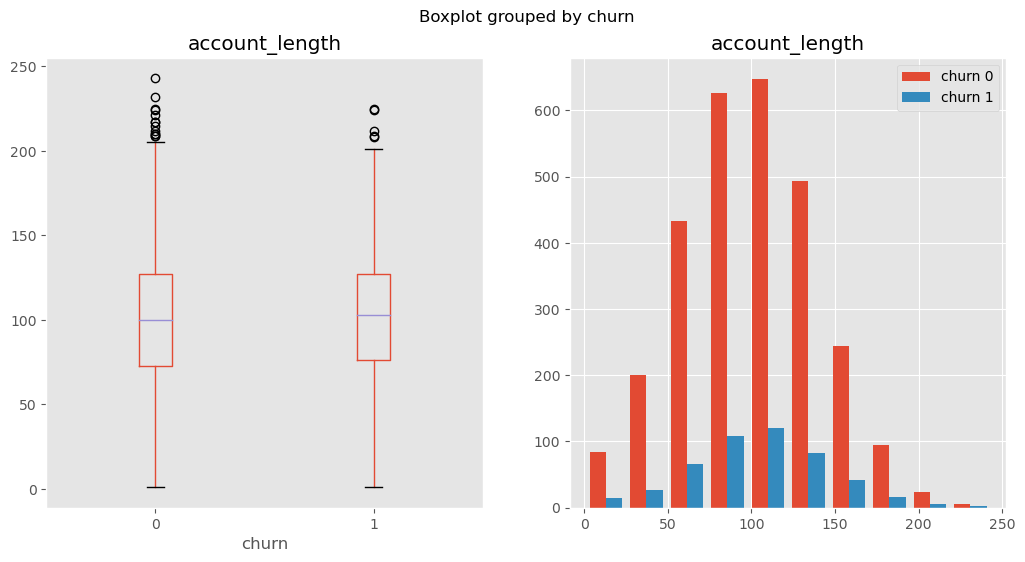

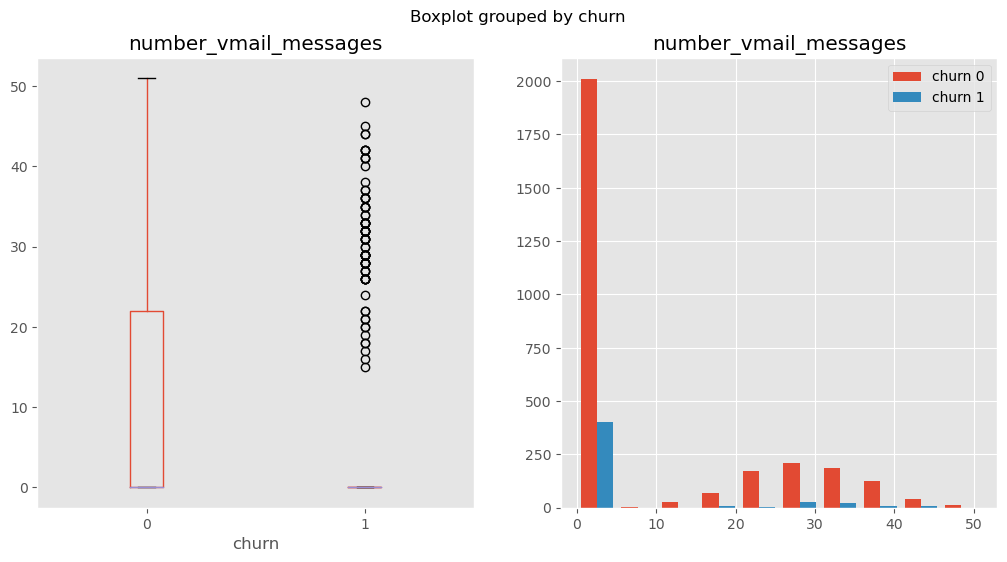

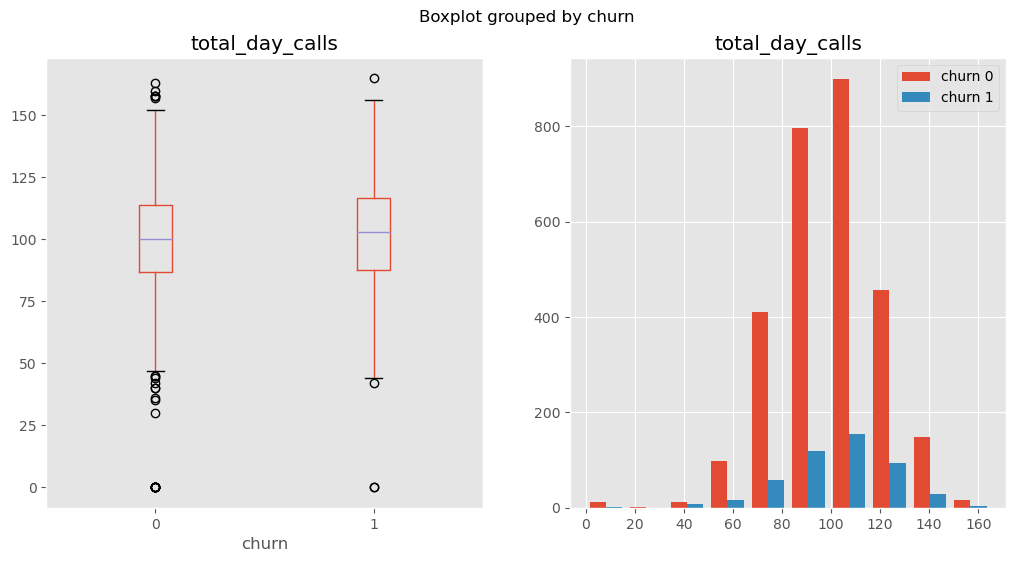

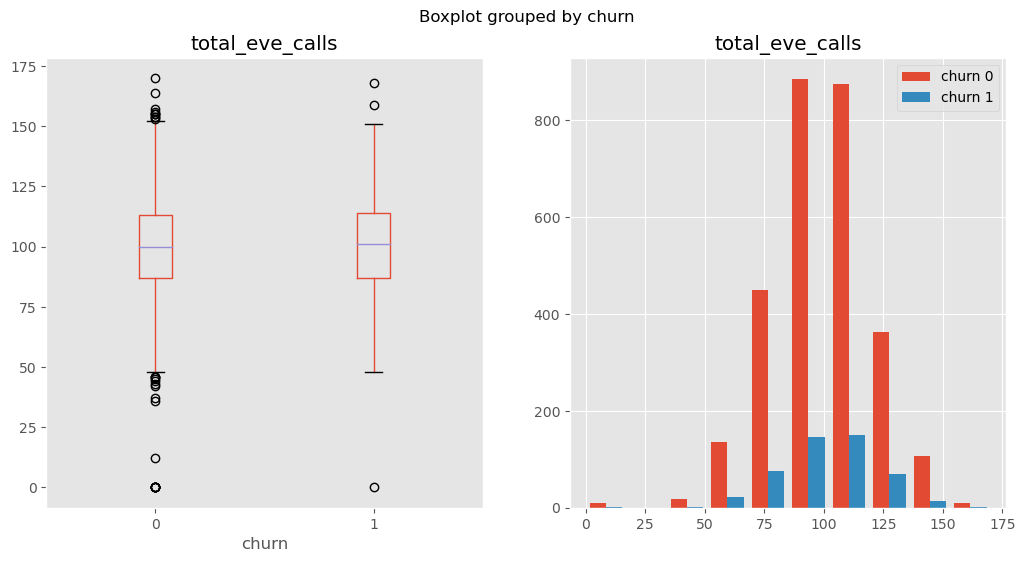

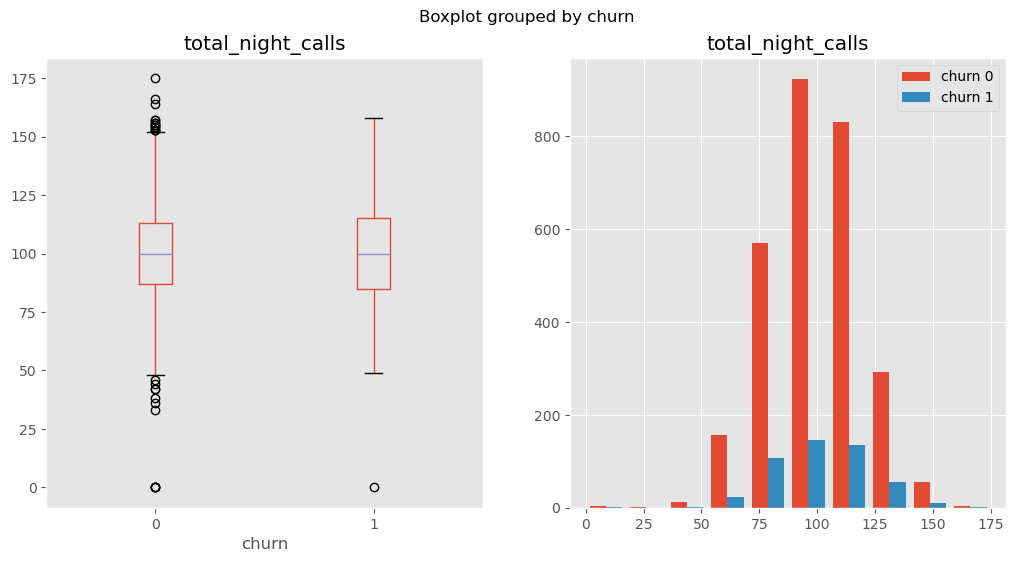

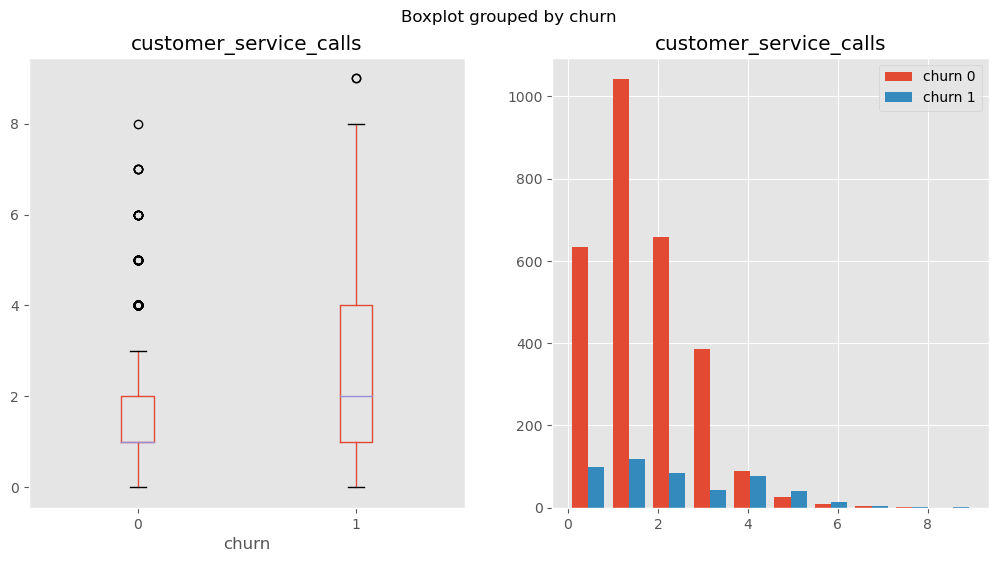

In [34]:
#overview with box-plot and histogram
for column in int_cols:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    # boxplots
    df.boxplot(column=column, by='churn', grid=False, ax=ax[0])
    
    # grouped histogram
    grouped_data = [group[column] for _, group in df.groupby('churn')]
    ax[1].hist(grouped_data, label=df['churn'].unique())
    ax[1].set_title(column)
    ax[1].legend(['churn 0', 'churn 1'])
    plt.show()


<h4 id="first-impression">first impression<a target="_self" href="#first-impression" class="jp-InternalAnchorLink">¶</a></h4>
It appears that <code>customer_service_calls</code> has many outliers among customers who have not churned.



### Analyzing the int columns

In [35]:
# change churn to int for analyse
df['churn'] = df['churn'].astype('int8')

In [36]:
# logistic regression model for every int_col

for col in int_cols:
    print(col)
    model = smf.logit(formula='Q("churn") ~ Q(col)', data=df)
    results = model.fit()
    print(results.summary())
    print('\n')

account_length
Optimization terminated successfully.
         Current function value: 0.413649
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Q("churn")   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0003303
Time:                        16:19:40   Log-Likelihood:                -1378.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                    0.3398
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8950      0.136    -13.971      0.000      -2.161      -1.629
Q(col)        

In [37]:
# multivariate logit regression model with 
formula = 'churn ~ ' + ' + '.join(int_cols)
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.389662
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3326
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.05830
Time:                        16:20:20   Log-Likelihood:                -1298.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 3.994e-32
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.0811      0.462     -6.675      0.000      -3.986      

### Conclusion
The model has a pseudo R-squared value of <b>0.05830</b>, which means that it accounts for approximately <b>5.83%</b> of the variability in the data. <br>
Based on the p-values, <code>number_vmail_messages</code> and <code>customer_service_calls</code> are significant predictors of churn, with p-values less than <b>0.05</b>. <br>
Therefore, further investigation into these two variables is warranted. 

In [38]:
# multivariate logit regression model with 
formula = 'churn ~ + number_vmail_messages + customer_service_calls'
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.390222
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3330
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.05695
Time:                        16:22:15   Log-Likelihood:                -1300.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.805e-35
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.3263      0.088    -26.302      0.000      -2.500      

### Conclusion
The positive coefficient for <code>customer_service_calls</code> suggests that as the number of customer service calls increases, the likelihood of churn also increases. <br>
This means that customers who make more calls to customer service are more likely to cancel their service. 

In [39]:
# looking at customer service calls closer

# average customer service calls of people who churned
print('Mean Customer Calls By Churn \n####')
avg_customer_service_calls_by_churn = df.groupby('churn')['customer_service_calls'].mean()  
print(avg_customer_service_calls_by_churn)

# dataframe with every customer who has more than the mean customer service calls  (3 in this case)
high_risk_customers_by_service_calls = df[(df['churn'] == 0) & (df['customer_service_calls'] >= avg_customer_service_calls_by_churn.loc[1])]
# high_risk_customers_by_service_calls = df[(df['churn'] == 0) & (df['customer_service_calls'] >= 2)] # for service calls of 2

print(f'\n\nDataframe with {len(high_risk_customers_by_service_calls)} potentiell high risk customers:\n')
print(high_risk_customers_by_service_calls['customer_service_calls'].describe())

Mean Customer Calls By Churn 
####
churn
0    1.434737
1    2.209110
Name: customer_service_calls, dtype: float64


Dataframe with 514 potentiell high risk customers:

count    514.000000
mean       3.363813
std        0.747924
min        3.000000
25%        3.000000
50%        3.000000
75%        3.750000
max        8.000000
Name: customer_service_calls, dtype: float64


## Conclusion for the int-columns
We used the mean (approximately 2.2) as the threshold for customer service calls, rather than the median (2). <br>
We then created a new dataframe containing high-risk customers who have not yet churned but have made 3 or more customer service calls. <br>
This resulted in a list of <b>514 potential high-risk customers.</b> <br>
However, if we used a lower threshold of 2 customer service calls, the list would include approximately 1200 customers. <br>

### Speculation
Because we now know the potential for churn are high number of service calls and the cities with disproportionately amount of churn it is reasonably likly that some cities experience more problems. So let's test for that hypothesis. 

In [40]:
# Least Churn
print('Cities with the most total of service calls.')
print('###################################')
city_calls = df.groupby('city')['customer_service_calls'].sum()
display(city_calls.sort_values(ascending=False))
print('\n \n')

print('Percentage of the cities service calls of all service calls.')
print('###################################')
percentage_city_calls = city_calls / city_calls.sum() * 100
percentage_city_calls = percentage_city_calls.sort_values(ascending=False)
display(round(percentage_city_calls,2))
print('\n \n')

print('Each city’s share of the data as a percentage.')
print('###################################')
display(round(percentage_city_all,2)) # percent_city_all from the city calculation from above

Cities with the most total of service calls.
###################################


city
Orlando            984
Miami              841
Jacksonville       510
Cape Coral         453
Tallahassee        430
Daytona Beach      424
Clearwater         418
Sarasota           393
West Palm Beach    365
Tampa              338
Name: customer_service_calls, dtype: int16


 

Percentage of the cities service calls of all service calls.
###################################


city
Orlando            19.08
Miami              16.31
Jacksonville        9.89
Cape Coral          8.79
Tallahassee         8.34
Daytona Beach       8.22
Clearwater          8.11
Sarasota            7.62
West Palm Beach     7.08
Tampa               6.56
Name: customer_service_calls, dtype: float64


 

Each city’s share of the data as a percentage.
###################################


city
Orlando            18.12
Miami              16.65
Jacksonville        9.96
Cape Coral          9.09
Tallahassee         8.43
Daytona Beach       8.31
Tampa               7.56
Sarasota            7.47
Clearwater          7.35
West Palm Beach     7.05
dtype: float64

In [42]:
float_cols = ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge',
              'total_night_minutes','total_night_charge']

c:\Users\Dabbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


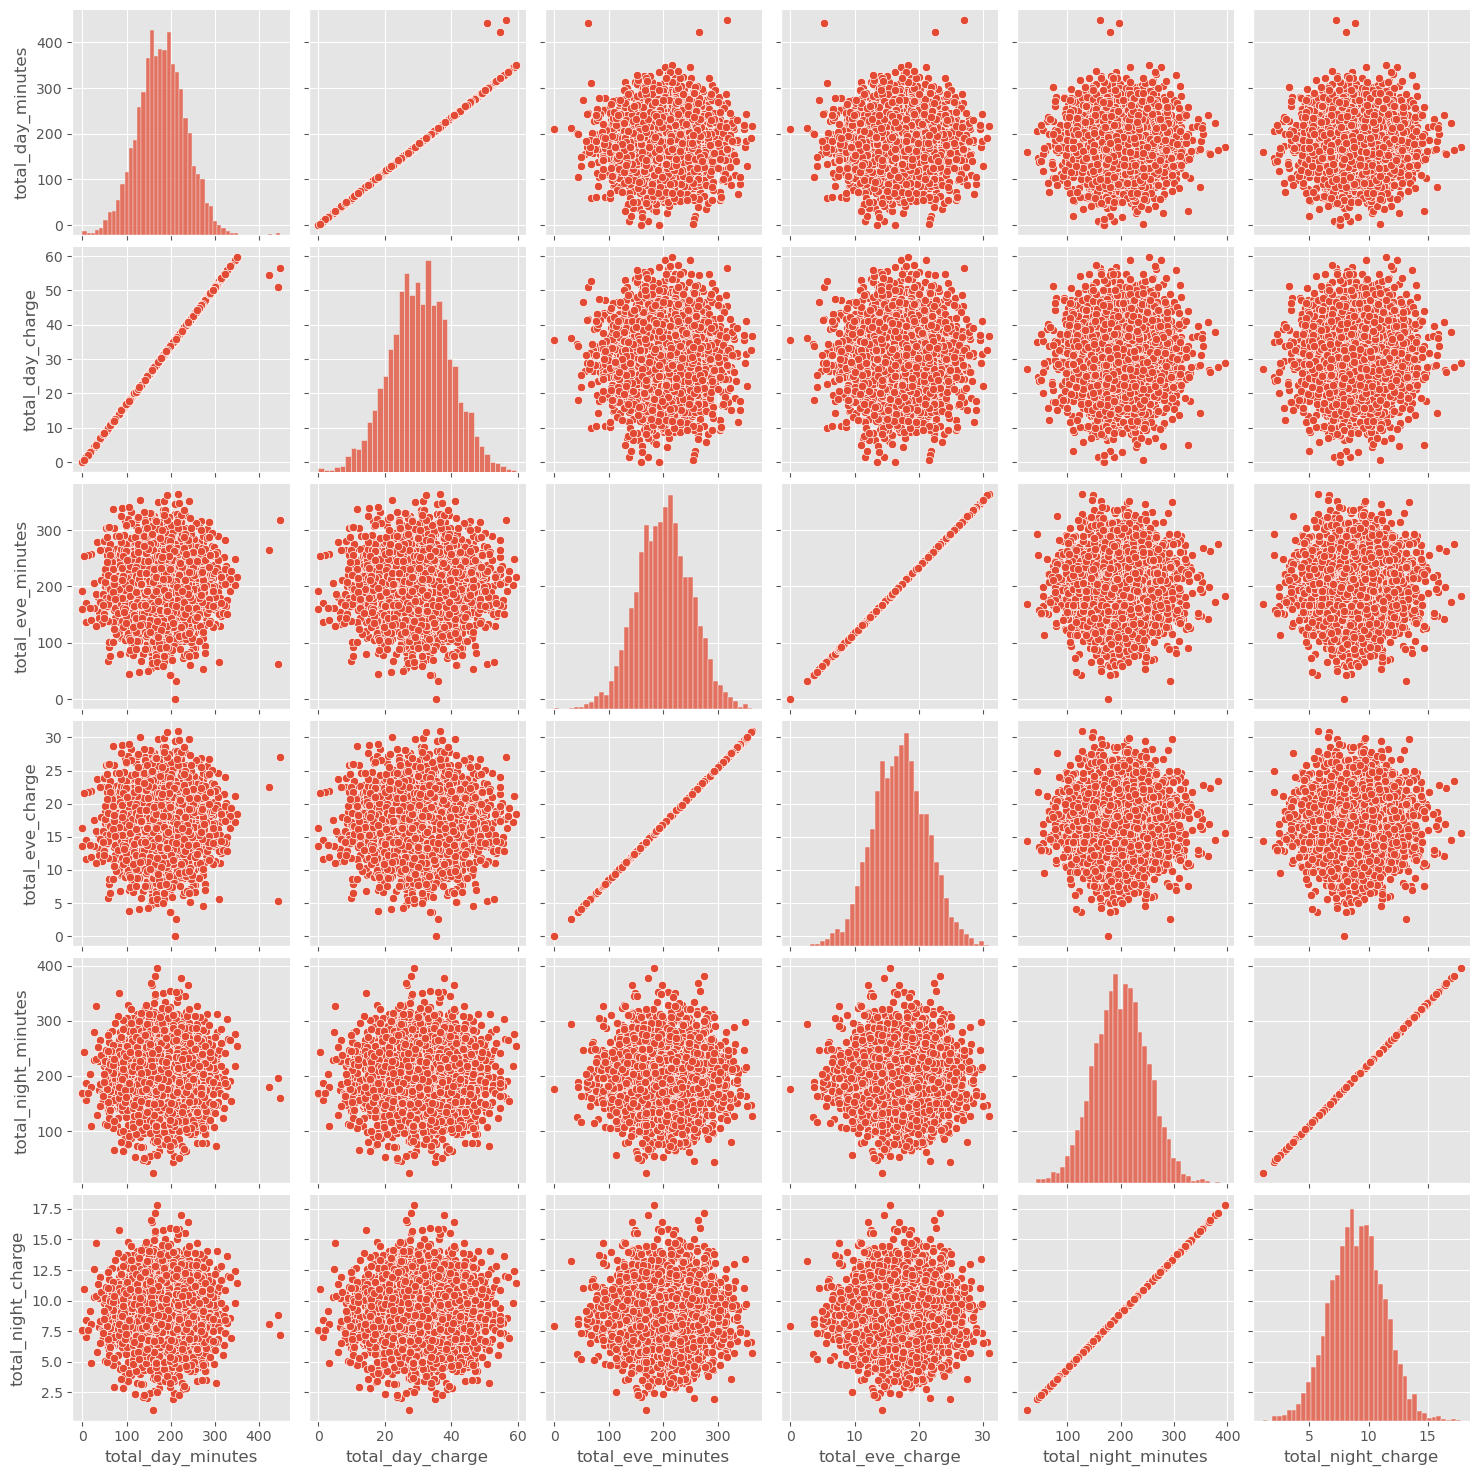

In [43]:
sns.pairplot(data=df[float_cols])

### Speculation Resolved
The data on the total number of service calls and the city’s proportion of that data do not indicate that one city has a higher number of issues or service calls compared to other cities. 

## <strong>4c)</strong> Welche <strong>Fließkomma</strong>-Datenreihe könnte diese Auswahl ergänzen? Bestimme den <strong>Grenzwert</strong> hier mit einer <strong>logistischen Regression</strong>. Welche Kunden sollten kontaktiert werden, wenn man dieser Datenreihe folgt?<a target="_self" href="#4c)-Welche-Fließkomma-Datenreihe-könnte-diese-Auswahl-ergänzen?-Bestimme-den-Grenzwert-hier-mit-einer-logistischen-Regression.-Welche-Kunden-sollten-kontaktiert-werden,-wenn-man-dieser-Datenreihe-folgt?" class="jp-InternalAnchorLink">¶</a>


### Overview for the float columns¶


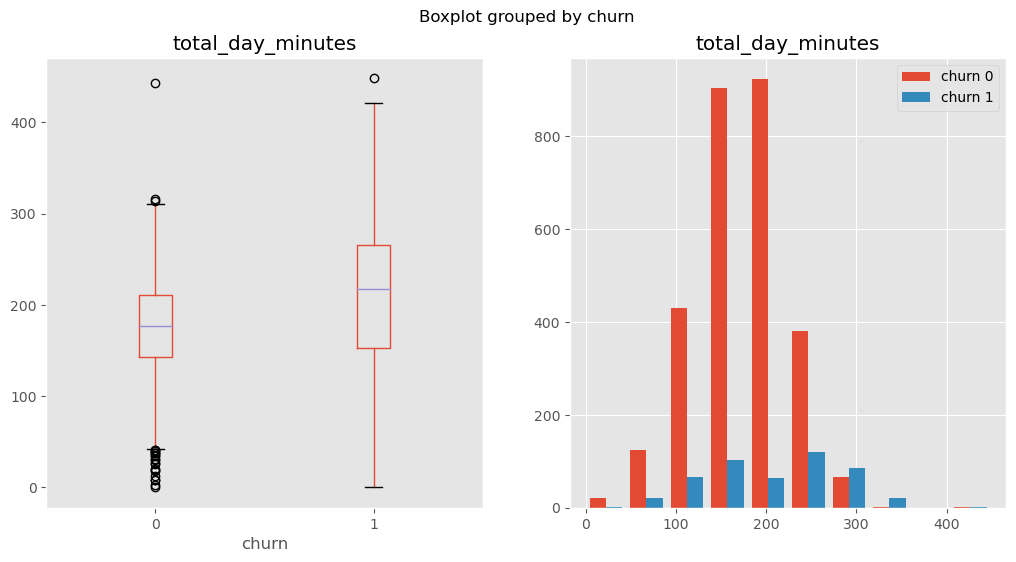

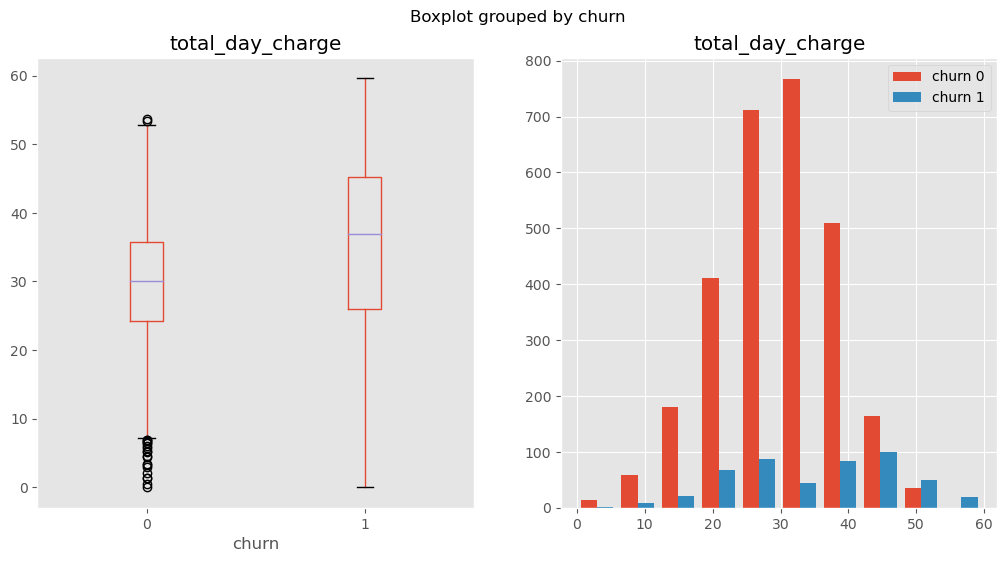

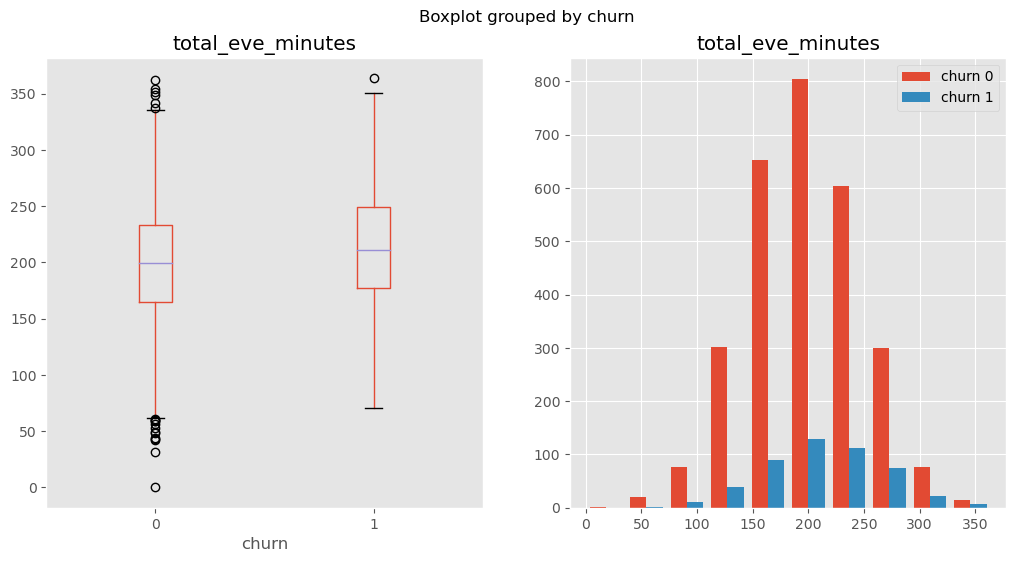

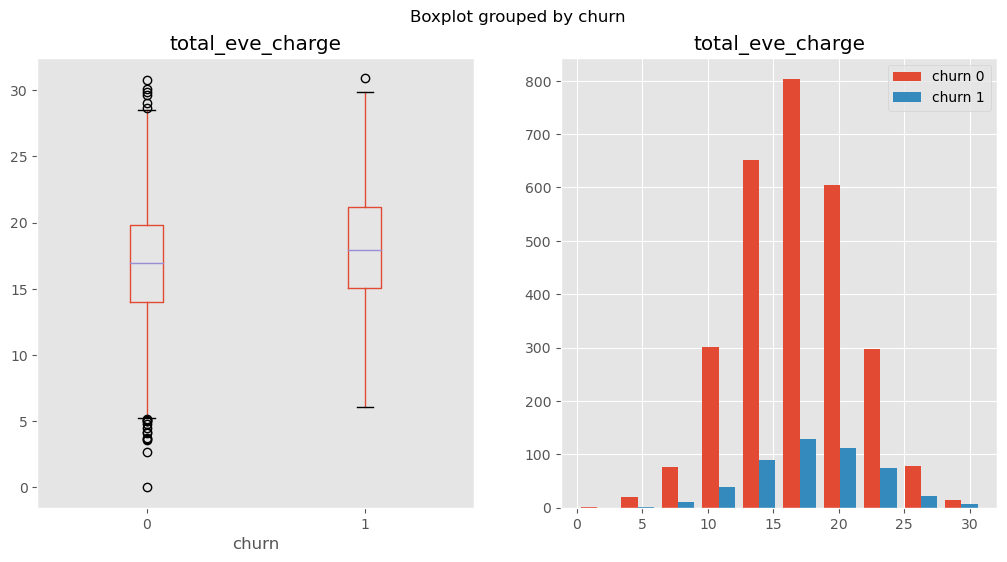

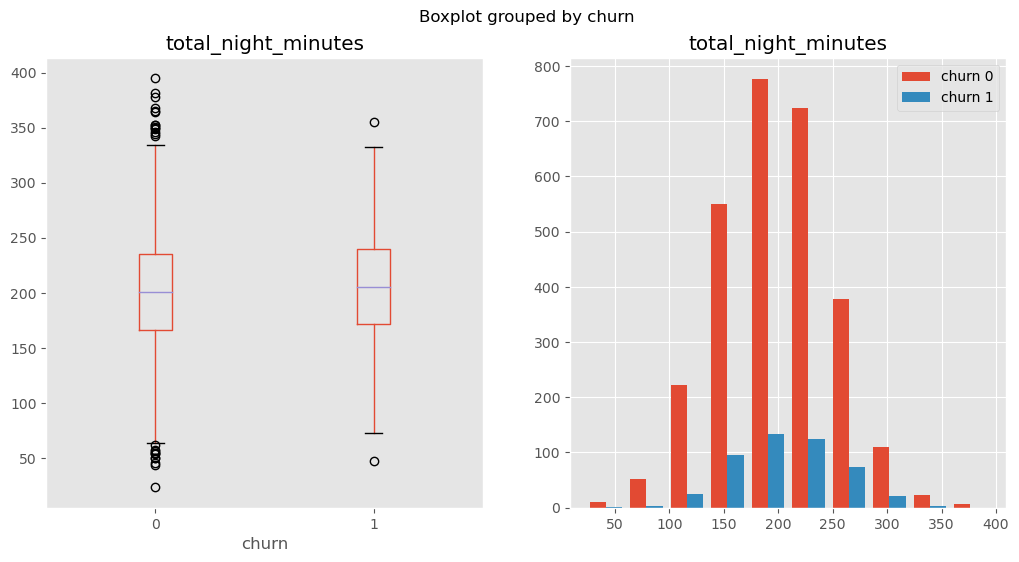

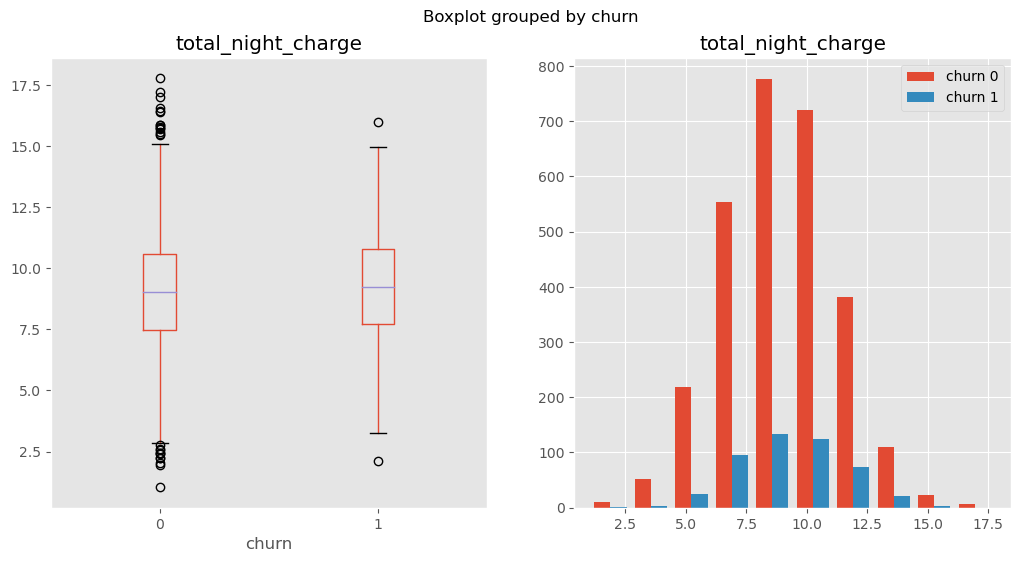

In [44]:
for column in float_cols:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    # boxplots
    df.boxplot(column=column, by='churn', grid=False, ax=ax[0])
    
    # grouped histogram
    grouped_data = [group[column] for _, group in df.groupby('churn')]
    ax[1].hist(grouped_data, label=df['churn'].unique().tolist())
    ax[1].set_title(column)
    ax[1].legend(['churn 0', 'churn 1'])
    plt.show()

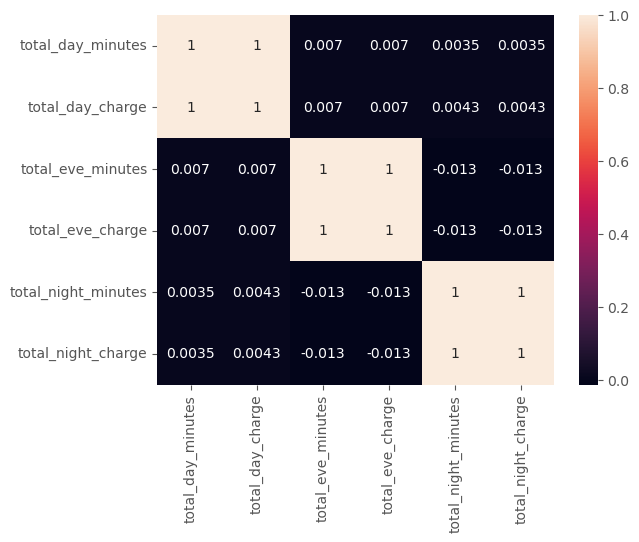

In [45]:
sns.heatmap(df[float_cols].corr(), annot=True);

### First Impressions
You can separate the <b>float columns </b> into two groups: minutes and charges, based on the day, evening, and night columns. <br>
There is a <b>clear correlation </b> between the <code>charge</code> and <code> total_minutes </code>. <br>
We will examine both groups, but due to the strong positive correlation, it would be sufficient to only look at one of them.

### Analyzing the float columns

In [46]:
# multivariate logit regression model with the minutes group
formula = 'churn ~ total_day_minutes + total_eve_minutes + total_night_minutes'
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.387022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.06468
Time:                        16:29:25   Log-Likelihood:                -1289.9
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 1.951e-38
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.4992      0.368    -14.941      0.000      -6.221      -4.778
to


<h4 id="Conclusion">Conclusion<a target="_self" href="#Conclusion" class="jp-InternalAnchorLink">¶</a></h4>
the coefficient for <code>total_day_minutes</code> is <b>0.0112</b>, which means that for <b>every additional minute</b> 
spent on day calls, the log-odds of churn increase by <b>0.0112</b>. 

<p>It appears that all three variables are associated with customer churn to some extent. <code>total_day_minutes</code>
has the strongest relationship with customer churn as indicated by its larger coefficient and smaller p-value 
compared to the other two variables.</p>
<p>So we will investigate <code>total_day_minutes</code> further below.</p>


In [47]:
# multivariate logit regression model with the charge group
formula = 'churn ~ total_day_charge + total_eve_charge + total_night_charge'
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.387075
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.06455
Time:                        16:29:58   Log-Likelihood:                -1290.1
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 2.325e-38
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.5179      0.369    -14.963      0.000      -6.241      -4.795
total


<h4 id="Conclusion">Conclusion<a target="_self" href="#Conclusion" class="jp-InternalAnchorLink">¶</a></h4>

<p>The coefficient for <code>total_day_charge</code> is <b>0.0668</b>, which means that for <b>every one-unit increase</b>, 
the log-odds of churn increase by <b>0.0668</b>.</p>
<p>All three variables are associated with customer churn to some extent. <code>total_day_charge</code> has 
the strongest relationship with customer churn as indicated by its larger coefficient and smaller p-value compared to 
the other two variables.</p>
<p>So we will investigate <code>total_day_charge</code> further below.</p>
<h4 id="-Summary-"> Summary <a target="_self" href="#-Summary-" class="jp-InternalAnchorLink">¶</a></h4>

<p>All three variable groups (day, evening, night) show that higher usage (and higher resulting cost) show an increase chance 
for churnage. <br>
We will look more in depth into the day calls (<code>total_day_charge</code> and <code>total_day_minutes</code>) because
they have a slightly higher coeffecient.</p>



<h4 id="Analysis-of-Total-Day-Charge">Analysis of Total Day Charge<a target="_self" href="#Analysis-of-Total-Day-Charge" class="jp-InternalAnchorLink">¶</a></h4>


In [48]:
print('Median Day Charge By Churn \n#####')
median_total_day_charge_by_churn = df.groupby('churn')['total_day_charge'].median()
print(median_total_day_charge_by_churn)

# dataframe with every customer who has more than the mean customer service calls  (3 in this case)
high_risk_customers_by_total_day_charge = df[(df['churn'] == 0) & (df['total_day_charge'] > median_total_day_charge_by_churn.loc[1])]
print(f'\n\nDataframe with {len(high_risk_customers_by_total_day_charge)} potentiell high risk customers:\n')
print(high_risk_customers_by_total_day_charge['total_day_charge'].describe())

Median Day Charge By Churn 
#####
churn
0    30.120001
1    36.990002
Name: total_day_charge, dtype: float32


Dataframe with 567 potentiell high risk customers:

count    567.000000
mean      41.278309
std        3.499948
min       37.009998
25%       38.395000
50%       40.430000
75%       43.219999
max       53.650002
Name: total_day_charge, dtype: float64



<h4 id="-Conclusion-"> Conclusion <a target="_self" href="#-Conclusion-" class="jp-InternalAnchorLink">¶</a></h4>

<p>The median of charges of customers who churned was around 37$ so I created a dataframe with all the customers who haven't churned
and have an higher charge amount than 37.</p>
<p>This resulted in a dataframe with <b>567 potentiell high risk customers</b>.</p>



<h4 id="Analysis-of-Total-Day-Minutes">Analysis of Total Day Minutes<a target="_self" href="#Analysis-of-Total-Day-Minutes" class="jp-InternalAnchorLink">¶</a></h4>


In [50]:
# could be cut because similar data to total_charge data (but i keep it for the visualization)
print('Median Day Minutes By Churn \n#####')
median_total_day_minutes_by_churn = df.groupby('churn')['total_day_minutes'].median()
print(median_total_day_minutes_by_churn)

# dataframe with every customer who has more than the mean customer service calls  (3 in this case)
high_risk_customers_by_total_day_minutes = df[(df['churn'] == 0) & (df['total_day_minutes'] > median_total_day_minutes_by_churn.loc[1])]

print(f'\n\nDataframe with {len(high_risk_customers_by_total_day_minutes)} potentiell high risk customers:\n')
print(high_risk_customers_by_total_day_minutes['total_day_minutes'].describe())

Median Day Minutes By Churn 
#####
churn
0    177.199997
1    217.600006
Name: total_day_minutes, dtype: float32


Dataframe with 567 potentiell high risk customers:

count    567.000000
mean     243.064209
std       22.115164
min      217.699997
25%      225.849998
50%      237.800003
75%      254.250000
max      443.200012
Name: total_day_minutes, dtype: float64


(could also be cut)
proof the dataframes are identical 

In [51]:
# compares the two high_risk dataframes -> True if everything is identical, False if even one value is different
# in pandas version 1.1.1 df1.compare(df2)

print(high_risk_customers_by_total_day_minutes.equals(high_risk_customers_by_total_day_charge))

True



<h4 id="High-Risk-Dataframe">High Risk Dataframe<a target="_self" href="#High-Risk-Dataframe" class="jp-InternalAnchorLink">¶</a></h4>
Merging the ‘High Risk Dataframe’ obtained from analyzing both the int and float columns.


In [52]:
high_risk_df = pd.concat([high_risk_customers_by_total_day_charge,
                          high_risk_customers_by_service_calls,
                          high_risk_customers_by_int_plan])

print('Amount of customers before droping the duplicates:')
display(high_risk_df.shape)

print('\nCustomers who are identified in multiple risk categories:')
very_high_risk_df = high_risk_df.duplicated()
very_high_risk_df = high_risk_df[very_high_risk_df]
display(very_high_risk_df.shape)

print('\nAmount of customers after droping the duplicates')
high_risk_df = high_risk_df.drop_duplicates()
display(high_risk_df.shape)

Amount of customers before droping the duplicates:


(1267, 18)


Customers who are identified in multiple risk categories:


(213, 18)


Amount of customers after droping the duplicates


(1054, 18)

1054 potential high risk customer <br>
and 213 potential very high risk customer. 


<h4 id="Speculation">Speculation<a target="_self" href="#Speculation" class="jp-InternalAnchorLink">¶</a></h4>

<p>There are two potential reasons for the higher churn rate among customers with higher usage/charges. 
Since the cost of usage appears to be linear, customers may be switching to flat-rate alternatives or 
better price/usage offers from competitors.</p>
<p>Another possibility is that problems only become apparent with higher usage, leading to an increase in customer service calls 
and a higher churn rate. 
This will be further investigated below.</p>
<h4 id="linearer-Regression-Test">linearer Regression Test<a target="_self" href="#linearer-Regression-Test" class="jp-InternalAnchorLink">¶</a></h4>

<p>The relationship between the total amount of usage and the number of customer service calls is being tested.</p>


In [53]:
# add a column for total usage (sum of all minutes)
df['sum_total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

# linearer regression of service calls and total minutes
model_rating_abv = smf.ols(formula='customer_service_calls ~ sum_total_minutes', data=df)
results = model_rating_abv.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     customer_service_calls   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.155
Date:                    Mon, 21 Oct 2024   Prob (F-statistic):              0.283
Time:                            16:33:19   Log-Likelihood:                -5665.1
No. Observations:                    3333   AIC:                         1.133e+04
Df Residuals:                        3331   BIC:                         1.135e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.7061      0.150     11.390      0.000       1.412       2.000
sum_total_minutes    -0.0003      0.000     -1.075      0.283      -0.001       0.000
==============================================================================
Omnibus:                      576.645   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.267
Skew:                           1.086   Prob(JB):                    1.74e-227
Kurtosis:                       4.673   Cond. No.                     3.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


<h4 id="Speculation-Resolved">Speculation Resolved<a target="_self" href="#Speculation-Resolved" class="jp-InternalAnchorLink">¶</a></h4>
The R-squared value is <b>0.000</b>, which means that the variable <code>sum_total_minutes</code>
does not explain any of the variation in the variable <code>customer_service_calls</code>



<h2 id="Conclusion-for-the-float-columns">Conclusion for the float-columns<a target="_self" href="#Conclusion-for-the-float-columns" class="jp-InternalAnchorLink">¶</a></h2>

<p>There are many ways to approach this dataset. 
We could have separated the data by time of day or calculated the total charges for each customer. 
I chose to examine the minutes and charges by daytime to look for clues about the churn rate of customers. </p>
<p>Since the charge is directly influenced by the minutes used, it would have been sufficient to only look at one of these groups
to conclude that higher usage leads to an increase in customer churn. </p>
<p>I also investigated whether higher usage led to an increase in customer service calls, but found that this was not the case.</p>
<p>I created two dataframes: one with customers whose charges were above the median charges of customers who churned (approx. 37$),
and another with customers whose usage was above the median usage of customers who churned (approx. 218 mins). </p>
<p>As expected, the dataframes were identical and both identified <b>567 potential high-risk customers</b>.</p>


## <strong>5)</strong> <strong>Visualisierung</strong> der Stadtgebiete und der drei anderen ausgewählten Datenreihen<a target="_self" href="#5)-Visualisierung-der-Stadtgebiete-und-der-drei-anderen-ausgewählten-Datenreihen" class="jp-InternalAnchorLink">¶</a>

### City Campaign Visuals

In [54]:
# helper to label percentages on top of the bar in a bar graph
def label_bars(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        xval = bar.get_x() + bar.get_width() / 2
        ax.text(xval, yval + 0.01 * yval,
                '{:.1%}'.format(yval/100), ha='center')

### Cities with most churn


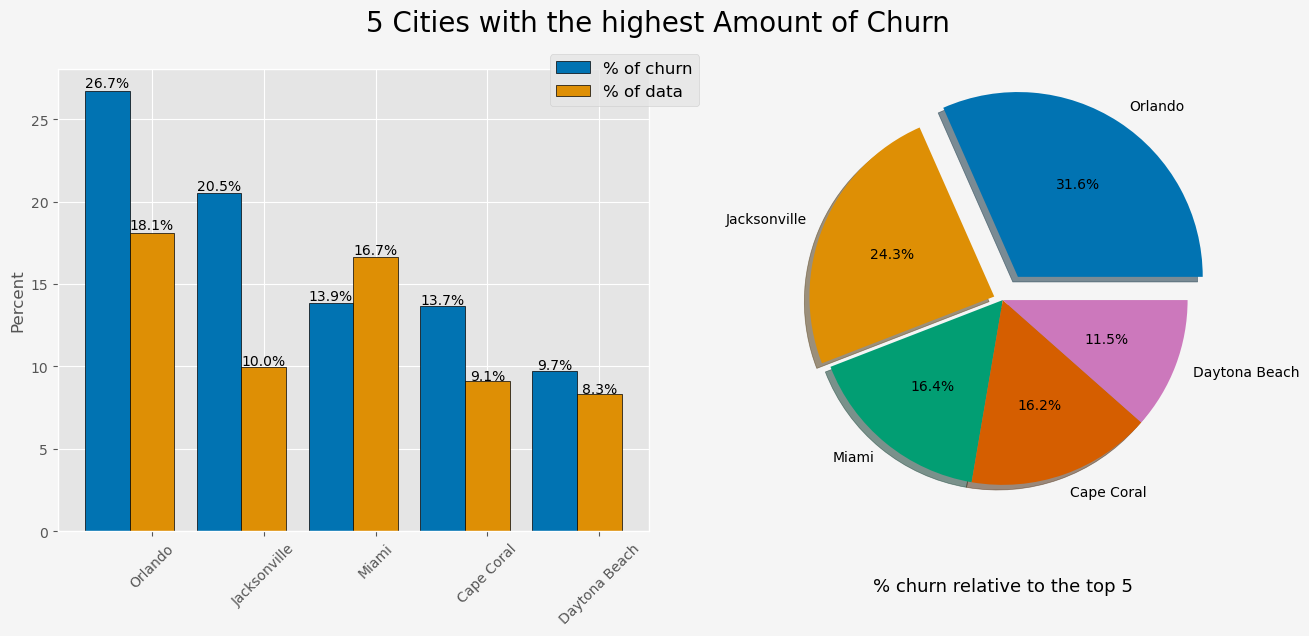

In [55]:
percentage_churn_city_yes_most = percentage_churn_city_yes
percentage_city_all_most = percentage_city_all

fig, ax = plt.subplots(1,2,
           figsize=(16,6))

amount = 5 # <- change for the number of city-data (max. 10)

fig.suptitle(f'{amount} Cities with the highest Amount of Churn', fontsize=20)

# figure 1 -> bar chart 
#######################
barWidth = 0.4
# Set position of bar on X axis
r1 = np.arange(len(churn_cities[:amount]))
r2 = [x + barWidth for x in r1]

# Make the plot
bars1 = ax[0].bar(r1[:amount],
                  percentage_churn_city_yes_most[:amount],
                  color='#0173b2',
                  width=barWidth,
                  edgecolor='black',
                  label='% of churn')

bars2 = ax[0].bar(r2[:amount],
                  percentage_city_all_most[percentage_churn_city_yes_most.index[r1]],
                  color='#de8f05',
                  width=barWidth,
                  edgecolor='black',
                  label='% of data')

# Add labels to bars
label_bars(ax[0],bars1)
label_bars(ax[0],bars2)

# Add xticks on the middle of the group bars
ax[0].set_xticks([r_most + barWidth for r_most in range(amount)])
ax[0].set_xticklabels(list(percentage_churn_city_yes_most.index)[:amount], rotation=45)
ax[0].set_ylabel('Percent')
ax[0].legend(bbox_to_anchor=(1.1, 1.05), fontsize=12)


# figure 2 -> pie chart
#######################
churn_cities[:amount].plot(kind= 'pie',
                           y= 'count',
                           autopct='%1.1f%%',
                           explode=[0.15, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0][:amount],
                           labeldistance=1.1,
                           shadow=True,
                           colors=['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494',
                                   '#ece133', '#56b4e9'],
                           ax=ax[1]
                          );
plt.subplots_adjust(wspace=0.1)
fig.set_facecolor('whitesmoke')
ax[1].set_ylabel('')

# set title below pie chart
ax[1].text(0.5, -0.1, '% churn relative to the top '+str(amount),
           ha='center',
           va='top',
           fontsize=13,
           transform=ax[1].transAxes)
plt.show()

### Cities with the least Amount of Churn

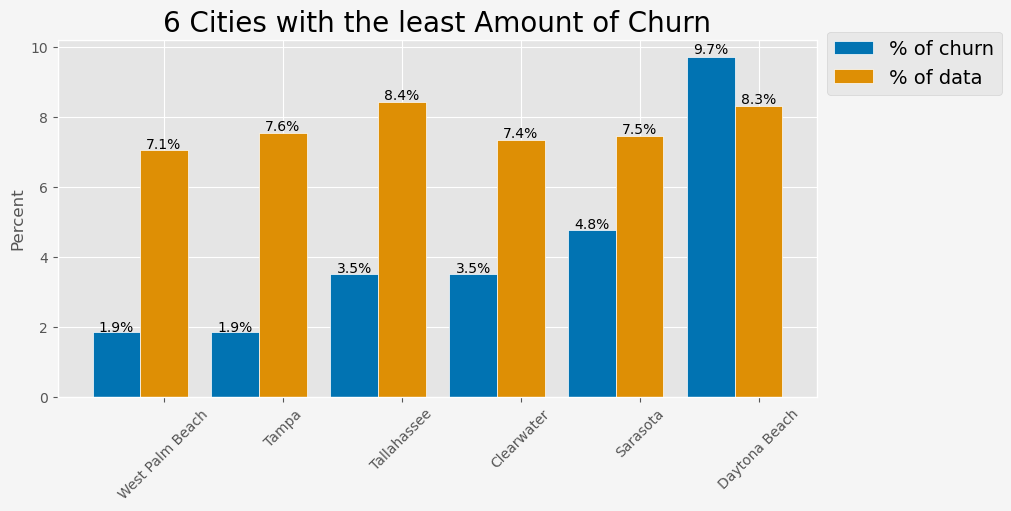

In [56]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)

amount = 6 # <- change for the number of city-data

barWidth = 0.4
percentage_churn_city_yes_least = percentage_churn_city_yes[::-1]
percentage_city_all_least = percentage_city_all[::-1]

fig.set_facecolor('whitesmoke')

# Set position of bar on X axis
r1 = np.arange(len(churn_cities[:amount]))
r2 = [x + barWidth for x in r1]

# Make the plot
bars1 = ax.bar(r1[:amount],
               percentage_churn_city_yes_least[:amount],
               color='#0173b2',
               width=barWidth,
               edgecolor='white',
               label='% of churn')

bars2 = ax.bar(r2[:amount],
               percentage_city_all_least[percentage_churn_city_yes_least.index[r1]],
               color='#de8f05',
               width=barWidth,
               edgecolor='white',
               label='% of data')

# Add labels to bars
label_bars(ax,bars1)
label_bars(ax,bars2)


# Add xticks on the middle of the group bars
ax.set_title(f'{amount} Cities with the least Amount of Churn', fontsize=20)
ax.set_xticks([r_least + barWidth for r_least in range(amount)])
ax.set_xticklabels(list(percentage_churn_city_yes_least.index)[:amount], rotation=45)
ax.set_ylabel('Percent')
ax.legend(bbox_to_anchor=(1, 1.05), fontsize=14);
plt.show()

### International Plan Visuals

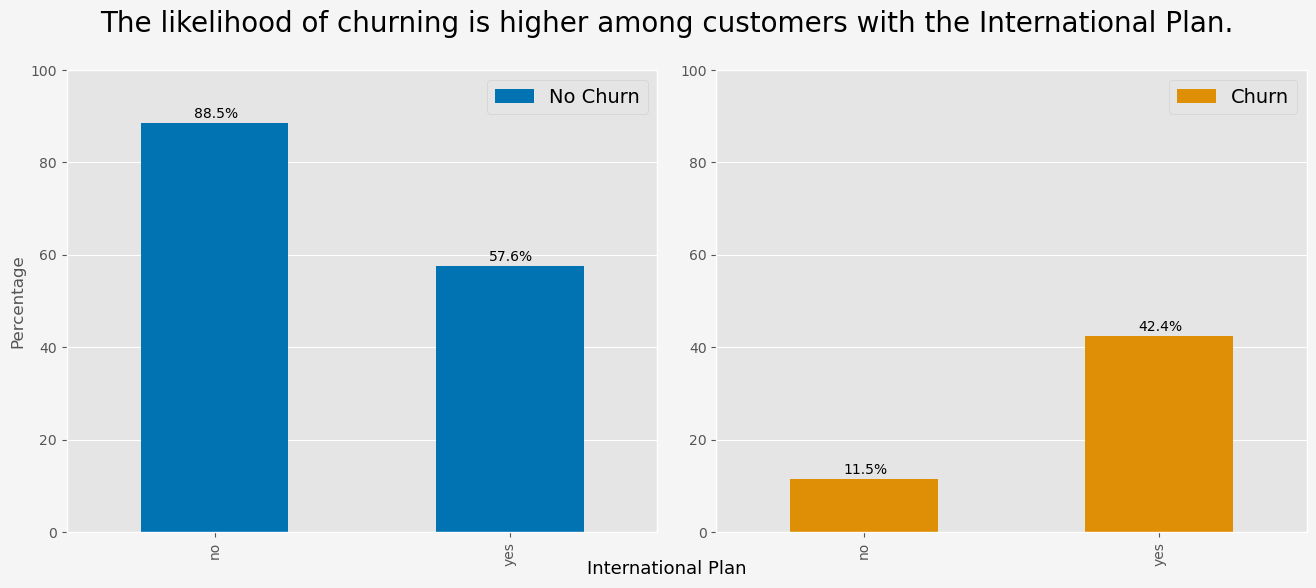

In [57]:
crosstab = pd.crosstab(df['international_plan'], df['churn'], normalize='index') *100

fig, ax = plt.subplots(1, 2,
                       figsize=(16,6)
                       )

crosstab[0].plot(kind='bar', ax=ax[0], color='#0173b2')
crosstab[1].plot(kind='bar', ax=ax[1], color='#de8f05')

plt.subplots_adjust(wspace=0.1)
fig.set_facecolor('whitesmoke')

# legend
ax[0].legend(bbox_to_anchor=(1.0, 1.0));
ax[1].legend(bbox_to_anchor=(1.0, 1.0));
ax[0].legend(['No Churn'], fontsize=14)
ax[1].legend(['Churn'], fontsize=14)

#grid
ax[0].grid(False)
ax[1].grid(False)
ax[0].grid(True, which='major', axis='y')
ax[1].grid(True, which='major', axis='y')

#y-axes
ax[0].set_ylim([0, 100])
ax[1].set_ylim([0, 100])
ax[0].set_ylabel('Percentage')

#title
fig.suptitle('The likelihood of churning is higher among customers with the International Plan.', fontsize=20)

# x-axes
fig.text(0.5, 0.04, 'International Plan', ha='center', fontsize=13)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

#percentage text above the graphs
for i in range(len(crosstab)):
    value = crosstab.iloc[i,0]
    ax[0].text(i-0.07, value +1, f'{value:.1f}%')
    value = crosstab.iloc[i,1]
    ax[1].text(i-0.07, value +1 , f'{value:.1f}%')
 
plt.show()

### Potential High Risk Customer by Service Calls

c:\Users\Dabbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


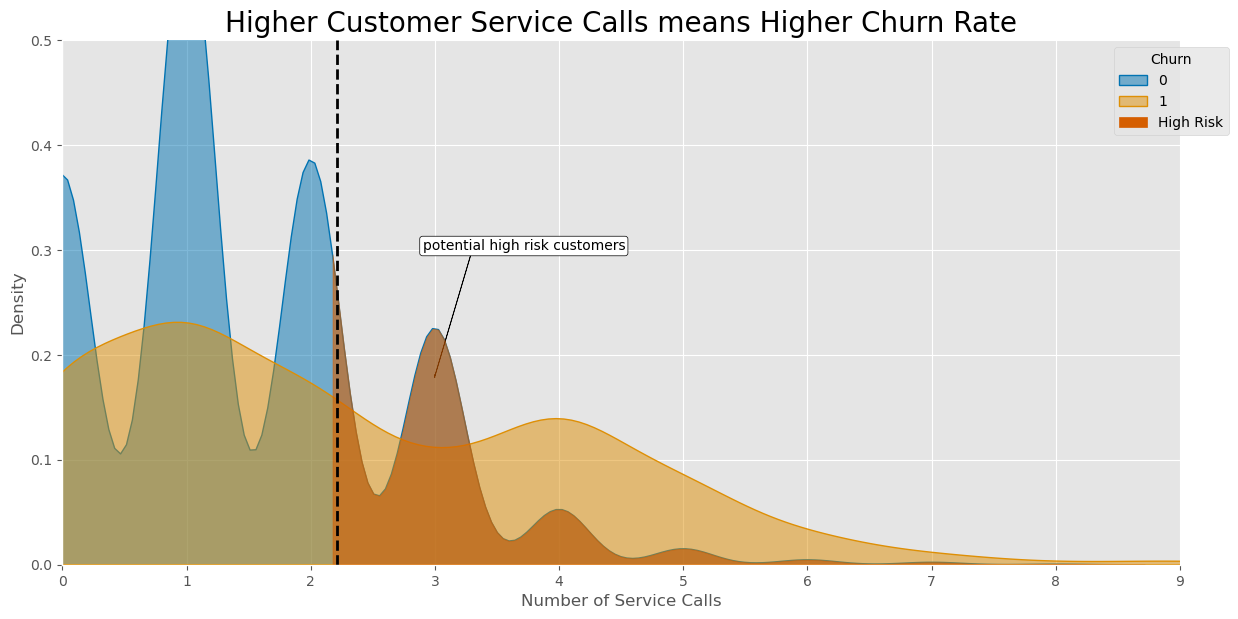

In [89]:
g = sns.FacetGrid(df,
                  hue='churn',
                  aspect=2,
                  height=6,
                  palette='colorblind'
                 )
# Map the kdeplot function to the FacetGrid object
g.map(sns.kdeplot, 'customer_service_calls', fill=True, alpha=0.5, linewidth=1)

# figure
g.ax.axvline(x=avg_customer_service_calls_by_churn[1], color='black', linestyle='--', linewidth=2)
g.set(xlabel='Number of Service Calls',
      ylabel='Density');
g.ax.set_title('Higher Customer Service Calls means Higher Churn Rate',
      fontsize=20)
    
g.ax.set_xlim(0, 9) 
g.ax.set_ylim(0, 0.5)
g.ax.set_xticks(range(0, 10, 1));

# textbox and arrow
g.ax.annotate('potential high risk customers', xy=(3.0,0.19), xytext=(2.9,0.30),
              bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='black')
             )
g.ax.arrow(3.3,0.30, -0.3, -0.12,  fc='black', ec='black')

# Create a dummy artist with the desired label
handles, labels = g.ax.get_legend_handles_labels()
high_risk_patch = mpatches.Patch(color='#d55e00', label='High Risk')
handles.append(high_risk_patch)
labels.append('High Risk')
g.ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper right', title='Churn')

# color in the area of the high risk customers
path = g.ax.collections[0].get_paths()[0]
x,y = path.vertices.T


mask = x > avg_customer_service_calls_by_churn[1] -0.05
g.ax.fill_between(x, y, where=mask, color='#d55e00', alpha=0.6);

plt.show()

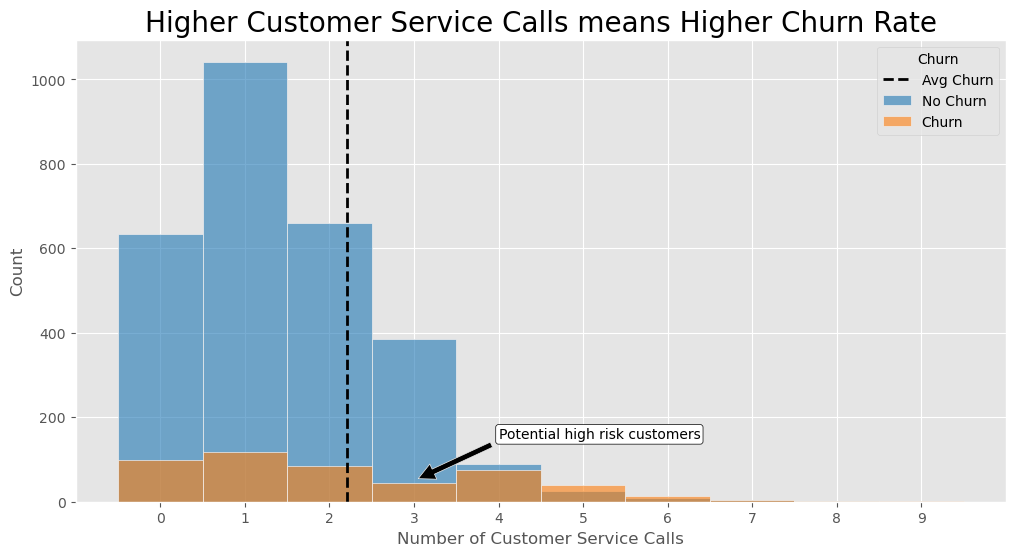

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average customer service calls by churn
avg_customer_service_calls_by_churn = df.groupby('churn')['customer_service_calls'].mean()

plt.figure(figsize=(12, 6))

# Plot the bars for non-churned customers with distinct color
sns.histplot(df[df['churn'] == 0]['customer_service_calls'], 
             bins=np.arange(-0.5, 10.5, 1), color='#1f77b4', label='No Churn', alpha=0.6, element='bars')

# Plot the bars for churned customers with distinct color
sns.histplot(df[df['churn'] == 1]['customer_service_calls'], 
             bins=np.arange(-0.5, 10.5, 1), color='#ff7f0e', label='Churn', alpha=0.6, element='bars')

# Add the vertical line for the average customer service calls by churn
plt.axvline(x=avg_customer_service_calls_by_churn[1], color='black', linestyle='--', linewidth=2, label='Avg Churn')

# Set labels and title
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.title('Higher Customer Service Calls means Higher Churn Rate', fontsize=20)
plt.legend(title='Churn')

# Adjust the x-axis ticks to be centered
plt.xticks(ticks=np.arange(0, 10, 1), labels=[f'{i}' for i in range(0, 10)], ha='center')

# Add annotation and arrow
plt.annotate('Potential high risk customers', xy=(3, 50), xytext=(4, 150),
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='black'),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


### Potential High Risk Customer by Day Charge

c:\Users\Dabbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


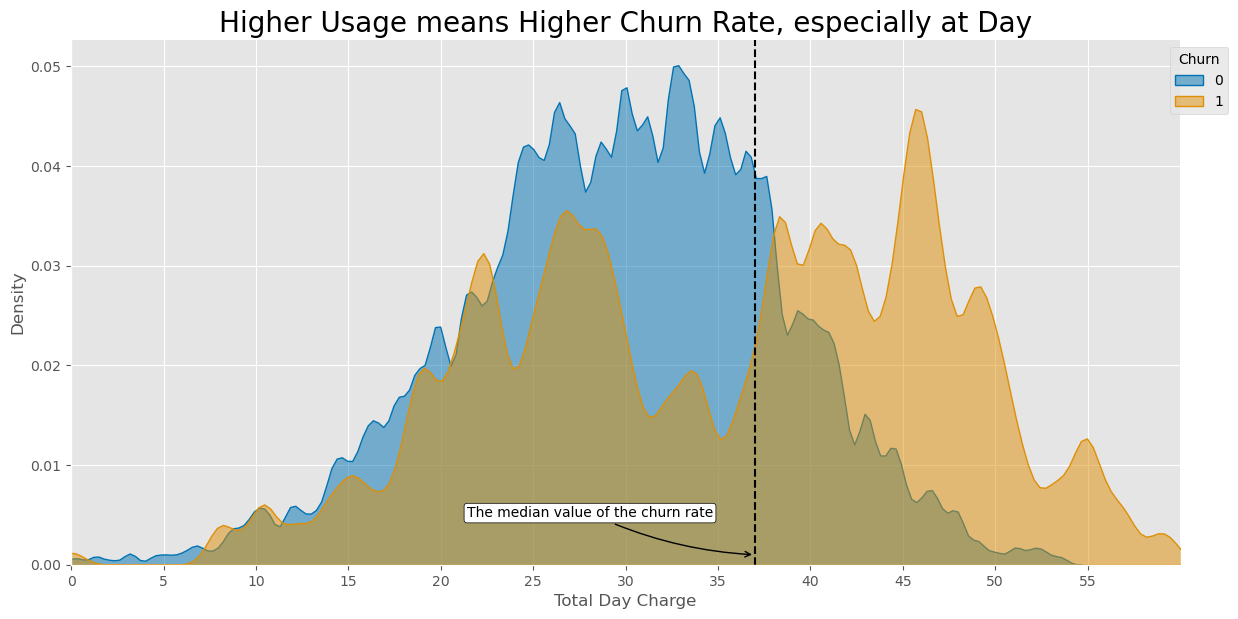

In [163]:
# seaborn facetgrid
g = sns.FacetGrid(df,
                  hue='churn',
                  aspect=2,
                  height=6,
                  palette='colorblind')

# map the kdeplot function to the FacetGrid object
g.map(sns.kdeplot,
      'total_day_charge',
      fill=True,
      alpha=0.5,
      linewidth=1,
      bw_adjust=.2      )

# xy labels and ticks
g.set(xlabel='Total Day Charge',
      ylabel='Density')
g.ax.set_title('Higher Usage means Higher Churn Rate, especially at Day',
      fontsize=20)

g.ax.set_xticks(range(0, 60, 5))
g.ax.set_xlim(0, 60) 

g.ax.annotate('The median value of the churn rate',
              xy=(median_total_day_charge_by_churn[1], 0.001),
              xytext=(-30, 30),
              textcoords='offset points',
              ha='right',
              va='center',
              bbox=dict(boxstyle='round,pad=0.2',
                        fc='white',
                        ec='black'),
              arrowprops=dict(arrowstyle='->',
                              connectionstyle='arc3,rad=0.1',
                              color='black', 
                              linewidth=1)
             )

# Create a dummy artist with the desired label
handles, labels = g.ax.get_legend_handles_labels()
high_risk_patch = mpatches.Patch(color='#d55e00', label='High Risk')
handles.append(high_risk_patch)
g.ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper right', title='Churn')

# line and color in the area of the high risk customers
g.ax.axvline(x=median_total_day_charge_by_churn[1], color='black', linestyle='--')

plt.show()

### Potential High Risk Customer by Day Usage

c:\Users\Dabbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


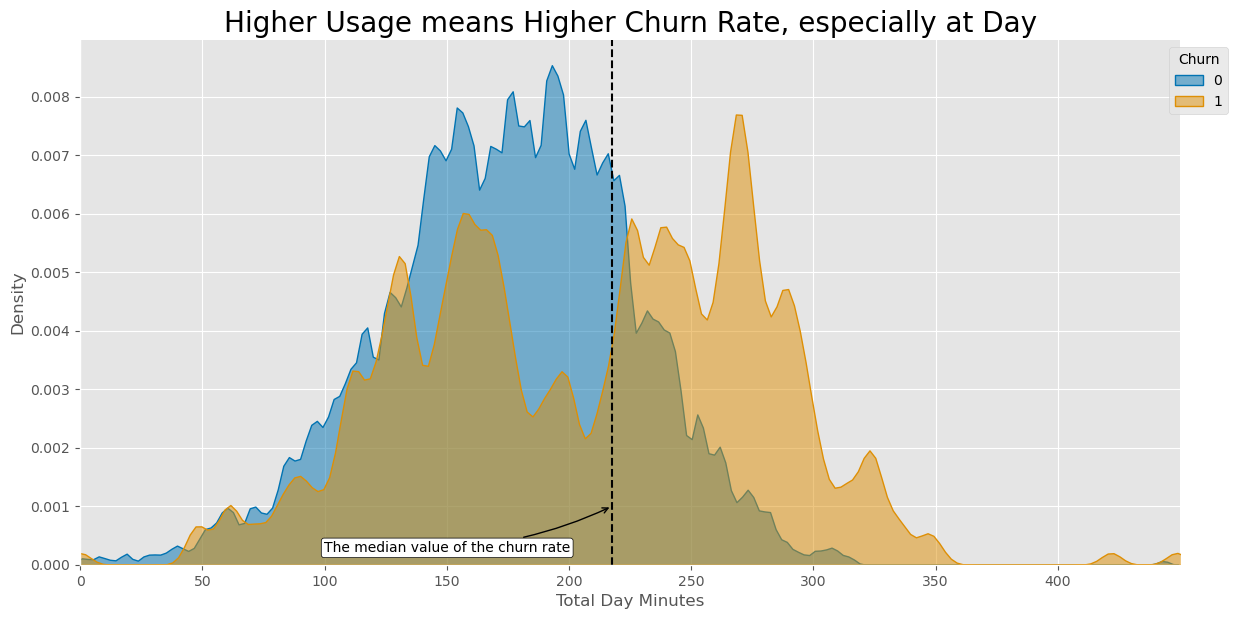

In [168]:
# seaborn facetgrid
g = sns.FacetGrid(df,
                  hue='churn',
                  aspect=2,
                  height=6,
                  palette='colorblind'
                 )
# map the kdeplot function to the FacetGrid object
g.map(sns.kdeplot,
      'total_day_minutes',
      fill=True,
      alpha=0.5,
      linewidth=1,
      bw_adjust=.2)

# xy label and title
g.set(xlabel='Total Day Minutes',
      ylabel='Density')
g.ax.set_title('Higher Usage means Higher Churn Rate, especially at Day',
      fontsize=20)

g.ax.set_xticks(range(0, 450, 50))
g.ax.set_xlim(0, 450) 

# line and annotation

g.ax.annotate('The median value of the churn rate',
              xy=(median_total_day_minutes_by_churn[1], 0.001),
              xytext=(-30, -30),
              textcoords='offset points',
              ha='right',
              va='center',
              bbox=dict(boxstyle='round,pad=0.2',
                        fc='white',
                        ec='black'),
              arrowprops=dict(arrowstyle='->',
                              connectionstyle='arc3,rad=0.1',
                              color='black',
                              linewidth=1)
             )

# Create a dummy artist with the desired label
handles, labels = g.ax.get_legend_handles_labels()
high_risk_patch = mpatches.Patch(color='#d55e00', label='High Risk')
handles.append(high_risk_patch)
g.ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper right', title='Churn')

# line and color in the area of the high risk customers
g.ax.axvline(x=median_total_day_minutes_by_churn[1],
             color='black',
             linestyle='--')


plt.show()